In [2]:
source('utils.R')

Let's break down the sctransform method 

# VST function

The *vst* function does regression and returns what? 

In [3]:
library(sctransform)
suppressWarnings({
    sct_res <- sctransform::vst(
        sctransform::pbmc,
        method = 'poisson',
        do_regularize = FALSE, 
        return_cell_attr = TRUE,
        return_corrected_umi = TRUE
    )
})


Calculating cell attributes for input UMI matrix
do_regularize is set to FALSE, will use all genes
Variance stabilizing transformation of count matrix of size 910 by 283
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 910 genes, 283 cells


  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 910 genes


  |======================================================================| 100%


Computing corrected count matrix for 910 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 6.549051 secs


## returned fields

In [27]:
sct_res$model_str

[1] "y ~ log_umi"

### Cell level

In [32]:
sct_res$cell_attr %>% head

,umi,gene,log_umi,log_gene,umi_per_gene,log_umi_per_gene
ACTCTCCTGCATAC,1496,349,3.174932,2.542825,4.286533,0.6321062
GTGATGACAAGTGA,1493,406,3.174060,2.608526,3.677340,0.5655338
AACCTACTGTGAGG,2364,383,3.373647,2.583199,6.172324,0.7904487
GGCACGTGTGAGAA,2423,496,3.384353,2.695482,4.885081,0.6888717
GTGTATCTAGTAGA,1305,334,3.115611,2.523746,3.907186,0.5918640
CATACTTGGGTTAC,2197,417,3.341830,2.620136,5.268585,0.7216940


### Gene level 

In [33]:
sct_res$gene_attr %>% head

,detection_rate,gmean,variance,residual_mean,residual_variance
GPI,0.2190813,0.1841255,0.3160414,0.0007655952,0.9729646
CARD8,0.1731449,0.1465388,0.2993509,-0.0013549333,0.9885794
RPS14,0.9681979,19.3360427,200.9544896,-0.0075674065,0.9250579
SMCHD1,0.1872792,0.1540841,0.4276871,-0.0001826681,1.4342126
ERP29,0.6925795,1.0706149,11.3077463,-0.0441405509,1.6137477
MGEA5,0.1872792,0.1496126,0.2243942,-0.0021881112,0.9279638


In [34]:
sct_res$genes_log_gmean_step1 %>% head

GPI      CARD8      RPS14     SMCHD1      ERP29      MGEA5 
-0.7348860 -0.8340474  1.2863676 -0.8122423  0.0296333 -0.8250319

In [36]:
sct_res$model_pars %>% nrow
sct_res$model_pars %>% head

[1] 910

,theta,(Intercept),log_umi
GPI,3.3521229,-9.4002076,2.603508
CARD8,0.7433014,-6.5666009,1.637666
RPS14,3.3383608,-0.3332966,1.144914
SMCHD1,0.6645334,-2.9397403,0.484841
ERP29,1.2573373,-3.4555406,1.279948
MGEA5,4.2785487,-6.8342292,1.713063


In [26]:
any(sct_res$model_pars_outliers)

[1] FALSE

### Matrices

Pearson or deviance residuals

In [29]:
sct_res$y %>% head

,ACTCTCCTGCATAC,GTGATGACAAGTGA,AACCTACTGTGAGG,GGCACGTGTGAGAA,GTGTATCTAGTAGA,CATACTTGGGTTAC,CAGTTTACACACGT,CCAGTCTGCGGAGA,GGGCCAACCTTGGA,ACGAACTGGCTATG,⋯,ACTTAAGATTACTC,GTCCACTGACCTCC,GTATTAGAAACAGA,AGATATTGGCCAAT,AATGGCTGACACCA,TGTTACTGGCTACA,AACCTTTGTACGCA,CACCACTGGCGAAG,ATTTCGTGTATGGC,GCACAATGGTGCAT
GPI,-0.5417565,1.1451157,-0.6817607,4.2839772,-0.5046675,-0.6577352,1.11132753,0.9271124,-0.7404865,-0.7665898,⋯,-0.3991445,-0.4085173,-0.4456926,-0.5391341,-0.38745340,4.8741825,-0.5591834,-0.3269238,-0.3713263,-0.3773146
CARD8,1.2738079,1.2755718,-0.4891534,-0.4920615,-0.4199701,-0.4805168,1.25298882,-0.5496200,-0.5094600,3.1803650,⋯,-0.3709802,1.7811633,-0.3934789,-0.4345475,-0.36508011,-0.3541579,-0.4427521,-0.3326972,-0.3567629,-0.3598760
RPS14,0.8151807,1.6437564,-0.8743810,0.3781424,0.3129751,0.6947864,0.09526662,0.7979991,0.4643574,-1.1159369,⋯,-0.5297290,0.9930717,-1.2519989,-0.5122212,0.01525508,-0.3423477,-0.9253259,-0.3907312,-0.6244077,0.5806247
SMCHD1,-0.4240315,1.2967221,-0.4389923,1.1721329,1.3322855,1.1969058,1.28995491,-0.4559372,-0.4446465,-0.4470737,⋯,-0.4053196,-0.4067067,-0.4119574,-0.4237254,-0.40355003,1.4959889,1.2800652,-0.3935775,-0.4010326,-0.4019781
ERP29,0.5468785,0.5483293,-0.5237770,1.3609070,-0.3510138,-0.1086547,-0.40093966,1.1559886,-0.2144622,-0.2444551,⋯,-0.2004828,-0.8089132,0.2800425,-0.8630607,-0.18033745,0.5033836,-0.8699458,-0.7633415,-0.7895902,-0.1621596
MGEA5,-0.4839225,1.4713004,-0.5674510,2.6550015,-0.4611695,1.1247144,-0.48798370,-0.6754775,-0.6018844,-0.6171590,⋯,-0.3940398,-0.4001797,-0.4241603,1.4782355,-0.38632350,-0.3722269,-0.4944995,-0.3451990,-0.3755673,-0.3795770


In [56]:
sct_res$umi_corrected[1:10, 1:20]

   [[ suppressing 20 column names ‘ACTCTCCTGCATAC’, ‘GTGATGACAAGTGA’, ‘AACCTACTGTGAGG’ ... ]]


10 x 20 sparse Matrix of class "dgCMatrix"
                                                                   
GPI        .  1  .  2  .  .  1  1  . .  .  .  .  . 1  .  .  1  .  1
CARD8      1  1  .  .  .  .  1  .  . 2  .  .  .  . .  .  1  .  .  .
RPS14     33 44 11 28 27 32 24 33 29 8 40 40 19 31 9 29 31 32 18 23
SMCHD1     .  1  .  1  1  1  1  .  . .  .  2  .  . .  .  1  .  1  1
ERP29      2  2  1  4  1  1  1  4  1 1  5  3  1  2 1  3  2  5  .  1
MGEA5      .  1  .  1  .  1  .  .  . .  .  1  1  . .  .  .  .  .  .
NUBP2      .  1  .  .  .  .  1  .  . .  .  2  .  1 .  .  .  1  .  .
LINC00152  1  .  .  .  .  .  1  .  . 2  .  .  .  . 1  .  .  1  .  .
ALOX5AP    .  1  .  .  2  .  3  .  . .  .  .  .  1 .  .  1  .  2  .
EMC4       .  1  1  2  .  1  2  .  . 1  .  .  1  . 1  1  .  1  .  .

# Function annotation

## vst

In [ ]:
function (umi, 
          cell_attr = NULL, 
          latent_var = c("log_umi"), 
          batch_var = NULL, 
          latent_var_nonreg = NULL, 
          n_genes = 2000, 
          n_cells = NULL, 
          method = "poisson", ## poisson, negative binomial, nb_theta_given, nb_fast
          do_regularize = TRUE, 
          res_clip_range = c(-sqrt(ncol(umi)), sqrt(ncol(umi))), 
          bin_size = 256, 
          min_cells = 5, 
          residual_type = "pearson", 
          return_cell_attr = FALSE, 
          return_gene_attr = TRUE, 
          return_corrected_umi = FALSE, 
          bw_adjust = 3, 
          gmean_eps = 1, 
          theta_given = NULL, 
          show_progress = TRUE
         ) 
    

In [62]:
umi <- sctransform::pbmc;
cell_attr = NULL;
latent_var = c("log_umi");
batch_var = NULL;
latent_var_nonreg = NULL;
n_genes = 2000; 
n_cells = NULL;
method = "poisson";
do_regularize = TRUE;
res_clip_range = c(-sqrt(ncol(umi)), sqrt(ncol(umi))); 
bin_size = 256; 
min_cells = 5;
residual_type = "pearson"; 
return_cell_attr = FALSE; 
return_gene_attr = TRUE;
return_corrected_umi = FALSE;
bw_adjust = 3; 
gmean_eps = 1;
theta_given = NULL;
show_progress = TRUE


This sets up the cell attributes

In [ ]:

# {
#     arguments <- as.list(environment())[-c(1, 2)]
#     start_time <- Sys.time()
    if (is.null(cell_attr)) {
        cell_attr <- data.frame(row.names = colnames(umi))
    }
    known_attr <- c("umi", "gene", "log_umi", "log_gene", "umi_per_gene", "log_umi_per_gene")
    if (all(setdiff(latent_var, colnames(cell_attr)) %in% known_attr)) {
        if (show_progress) {
            message("Calculating cell attributes for input UMI matrix")
        }
        tmp_attr <- data.frame(umi = colSums(umi), gene = colSums(umi > 
            0))
        tmp_attr$log_umi <- log10(tmp_attr$umi)
        tmp_attr$log_gene <- log10(tmp_attr$gene)
        tmp_attr$umi_per_gene <- tmp_attr$umi/tmp_attr$gene
        tmp_attr$log_umi_per_gene <- log10(tmp_attr$umi_per_gene)
        cell_attr <- cbind(cell_attr, tmp_attr[, setdiff(colnames(tmp_attr), 
            colnames(cell_attr)), drop = TRUE])
    }
    if (!all(latent_var %in% colnames(cell_attr))) {
        stop("Not all latent variables present in cell attributes")
    }
    if (!is.null(batch_var)) {
        if (!batch_var %in% colnames(cell_attr)) {
            stop("Batch variable not present in cell attributes; batch_var should be a column name of cell attributes")
        }
        cell_attr[, batch_var] <- as.factor(cell_attr[, batch_var])
        batch_levels <- levels(cell_attr[, batch_var])
    }

In [ ]:
    genes_cell_count <- rowSums(umi > 0)
    genes <- rownames(umi)[genes_cell_count >= min_cells]
    umi <- umi[genes, ]

    ## uses log10 for geometric gene means
    ## row_gmean is a C++ function
    ## gmean_eps protects against log(0); e.g. 1 for log1p
    genes_log_gmean <- log10(row_gmean(umi, eps = gmean_eps))
    if (!do_regularize) {
        if (show_progress) {
            message("do_regularize is set to FALSE, will use all genes")
        }
        n_genes <- NULL
    }

    ## This is only for using a small number of genes/cells to compute model
    ## NOTE TO SELF: in cluster specific fitting, maybe 10% of cells is enough (i.e. like in geometric sketching)
    if (!is.null(n_cells) && n_cells < ncol(umi)) {
        cells_step1 <- sample(x = colnames(umi), size = n_cells)
        if (!is.null(batch_var)) {
            dropped_batch_levels <- setdiff(batch_levels, levels(droplevels(cell_attr[cells_step1, 
                batch_var])))
            if (length(dropped_batch_levels) > 0) {
                stop("Dropped batch levels ", dropped_batch_levels, ", set n_cells higher")
            }
        }
        genes_cell_count_step1 <- rowSums(umi[, cells_step1] > 0)
        genes_step1 <- rownames(umi)[genes_cell_count_step1 >= min_cells]
        genes_log_gmean_step1 <- log10(row_gmean(umi[genes_step1, 
            cells_step1], eps = gmean_eps))
    }
    else {
        cells_step1 <- colnames(umi)
        genes_step1 <- genes
        genes_log_gmean_step1 <- genes_log_gmean
    }
    data_step1 <- cell_attr[cells_step1, ]


    if (!is.null(n_genes) && n_genes < length(genes_step1)) {
        log_gmean_dens <- density(x = genes_log_gmean_step1, 
            bw = "nrd", adjust = 1)
        sampling_prob <- 1/(approx(x = log_gmean_dens$x, y = log_gmean_dens$y, 
            xout = genes_log_gmean_step1)$y + .Machine$double.eps)
        genes_step1 <- sample(x = genes_step1, size = n_genes, 
            prob = sampling_prob)
        genes_log_gmean_step1 <- log10(row_gmean(umi[genes_step1, 
            cells_step1], eps = gmean_eps))
    }

In [ ]:
    ## Setup the model formula 
    if (!is.null(batch_var)) {
        model_str <- paste0("y ~ (", paste(latent_var, collapse = " + "), 
            ") : ", batch_var, " + ", batch_var, " + 0")
    }
    else {
        model_str <- paste0("y ~ ", paste(latent_var, collapse = " + "))
    }

    ## What are these bins used for? Smoothing? 
    bin_ind <- ceiling(x = 1:length(x = genes_step1)/bin_size)
    max_bin <- max(bin_ind)

    ## VERBOSE option
    if (show_progress) {
        message("Variance stabilizing transformation of count matrix of size ", 
            nrow(umi), " by ", ncol(umi))
        message("Model formula is ", model_str)
    }

In [ ]:
    ## This is the actual model fitting 
    model_pars <- get_model_pars(genes_step1, bin_size, umi, 
        model_str, cells_step1, method, data_step1, theta_given, 
        show_progress)

In [ ]:

    ## Now try to smooth parameters
    if (do_regularize) {
        model_pars[, "theta"] <- log10(model_pars[, "theta"])
        model_pars_fit <- reg_model_pars(model_pars, genes_log_gmean_step1, 
            genes_log_gmean, cell_attr, batch_var, cells_step1, 
            genes_step1, umi, bw_adjust, gmean_eps, show_progress)
        model_pars[, "theta"] <- 10^model_pars[, "theta"]
        model_pars_fit[, "theta"] <- 10^model_pars_fit[, "theta"]
        model_pars_outliers <- attr(model_pars_fit, "outliers")
    }
    else {
        model_pars_fit <- model_pars
        model_pars_outliers <- rep(FALSE, nrow(model_pars))
    }
    regressor_data <- model.matrix(as.formula(gsub("^y", "", model_str)), cell_attr)
    if (!is.null(latent_var_nonreg)) {
        if (show_progress) {
            message("Estimating parameters for following non-regularized variables: ", 
                latent_var_nonreg)
        }
        if (!is.null(batch_var)) {
            model_str_nonreg <- paste0("y ~ (", paste(latent_var_nonreg, 
                collapse = " + "), ") : ", batch_var, " + ", 
                batch_var, " + 0")
        }
        else {
            model_str_nonreg <- paste0("y ~ ", paste(latent_var_nonreg, 
                collapse = " + "))
        }
        model_pars_nonreg <- get_model_pars_nonreg(genes, bin_size, 
            model_pars_fit, regressor_data, umi, model_str_nonreg, 
            cell_attr, show_progress)
        regressor_data_nonreg <- model.matrix(as.formula(gsub("^y", 
            "", model_str_nonreg)), cell_attr)
        model_pars_final <- cbind(model_pars_fit, model_pars_nonreg)
        regressor_data_final <- cbind(regressor_data, regressor_data_nonreg)
    }
    else {
        model_str_nonreg <- ""
        model_pars_nonreg <- c()
        model_pars_final <- model_pars_fit
        regressor_data_final <- regressor_data
    }

    ## Compute residuals
    if (!residual_type == "none") {
        if (show_progress) {
            message("Second step: Get residuals using fitted parameters for ", 
                length(x = genes), " genes")
        }
        bin_ind <- ceiling(x = 1:length(x = genes)/bin_size)
        max_bin <- max(bin_ind)
        if (show_progress) {
            pb <- txtProgressBar(min = 0, max = max_bin, style = 3)
        }
        res <- matrix(NA_real_, length(genes), nrow(regressor_data_final), 
            dimnames = list(genes, rownames(regressor_data_final)))
        for (i in 1:max_bin) {
            genes_bin <- genes[bin_ind == i]
            
            ## Are these mu values pooled within the bin? 
            mu <- exp(tcrossprod(model_pars_final[genes_bin, -1, drop = FALSE], regressor_data_final))
            y <- as.matrix(umi[genes_bin, , drop = FALSE])
            
            ## Compute pearson or deviance residuals 
            ## Does binning give different results? 
            res[genes_bin, ] <- switch(
                residual_type, 
                pearson = (y - mu)/sqrt(mu + mu^2/model_pars_final[genes_bin, "theta"]), 
                deviance = deviance_residual(y, mu, model_pars_final[genes_bin, "theta"]))
            if (show_progress) {
                setTxtProgressBar(pb, i)
            }
        }
#         if (show_progress) {
#             close(pb)
#         }
    }
    else {
#         if (show_progress) {
#             message("Skip calculation of full residual matrix")
#         }
        res <- matrix(data = NA, nrow = 0, ncol = 0)
    }

In [ ]:
rv <- list(y = res, model_str = model_str, model_pars = model_pars, 
    model_pars_outliers = model_pars_outliers, model_pars_fit = model_pars_fit, 
    model_str_nonreg = model_str_nonreg, model_pars_nonreg = model_pars_nonreg, 
    arguments = arguments, genes_log_gmean_step1 = genes_log_gmean_step1, 
    cells_step1 = cells_step1, cell_attr = cell_attr)
rm(res)
gc(verbose = FALSE)
if (return_corrected_umi) {
    if (residual_type != "pearson") {
        warning("Will not return corrected UMI because residual type is not set to 'pearson'")
    }
    else {
        rv$umi_corrected <- sctransform::correct(rv, do_round = TRUE, 
            do_pos = TRUE, show_progress = show_progress)
        rv$umi_corrected <- as(object = rv$umi_corrected, 
            Class = "dgCMatrix")
    }
}
rv$y[rv$y < res_clip_range[1]] <- res_clip_range[1]
rv$y[rv$y > res_clip_range[2]] <- res_clip_range[2]
if (!return_cell_attr) {
    rv[["cell_attr"]] <- NULL
}
if (return_gene_attr) {
    if (show_progress) {
        message("Calculating gene attributes")
    }
    gene_attr <- data.frame(detection_rate = genes_cell_count[genes]/ncol(umi), 
        gmean = 10^genes_log_gmean, variance = row_var(umi))
    if (ncol(rv$y) > 0) {
        gene_attr$residual_mean = rowMeans(rv$y)
        gene_attr$residual_variance = row_var(rv$y)
    }
    rv[["gene_attr"]] <- gene_attr
}
if (show_progress) {
    message("Wall clock passed: ", capture.output(print(Sys.time() - start_time)))
}
return(rv)
# }

## get_model_pars

    Why break it up into bins? Looks like each gene is modeled separately and everything is just rbind-ed at the end of the function

In [ ]:
function (
    genes_step1, 
    bin_size, 
    umi, 
    model_str, 
    cells_step1, 
    method, 
    data_step1, ## covariates data? 
    theta_given,
    show_progress
) 

In [ ]:
    ## Again, what are these bins used for? Looks like it's just for the progress bar? 
    bin_ind <- ceiling(x = 1:length(x = genes_step1)/bin_size)
    max_bin <- max(bin_ind)

    ## VERBOSE
    if (show_progress) {
        message("Get Negative Binomial regression parameters per gene")
        message("Using ", length(x = genes_step1), " genes, ", 
            length(x = cells_step1), " cells")
    }
    if (show_progress) {
        pb <- txtProgressBar(min = 0, max = max_bin, style = 3)
    }

    
    model_pars <- list()
    for (i in 1:max_bin) {
        ## genes_bin_regress: genes in bin (i)
        genes_bin_regress <- genes_step1[bin_ind == i]
        umi_bin <- as.matrix(umi[genes_bin_regress, cells_step1, drop = FALSE])
        
        ## each bin gets an rbind? 
        model_pars[[i]] <- do.call(
            rbind, future_lapply(X = genes_bin_regress, FUN = function(j) {
                ## (j)th gene within this (i)th bin
                y <- umi_bin[j, ]
                if (method == "poisson") {
                  ## NOTE: y is globally defined? So don't need to put y into model data? 
                  fit <- glm(as.formula(model_str), data = data_step1, family = poisson)
                    
                  ## theta refers to all models returned by Poisson glm 
                  theta <- as.numeric(x = theta.ml(y = y, mu = fit$fitted))
                  return(c(theta, fit$coefficients))
                }
                if (method == "nb_theta_given") {
                  theta <- theta_given[j]
                  fit2 <- 0
                  try(fit2 <- glm(as.formula(model_str), data = data_step1, 
                    family = negative.binomial(theta = theta)), silent = TRUE)
                  if (class(fit2)[1] == "numeric") {
                    return(c(theta, glm(as.formula(model_str), 
                      data = data_step1, family = poisson)$coefficients))
                  }
                  else {
                    return(c(theta, fit2$coefficients))
                  }
                }
                if (method == "nb_fast") {
                  fit <- glm(as.formula(model_str), data = data_step1, family = poisson)
                  theta <- as.numeric(x = theta.ml(y = y, mu = fit$fitted))
                  fit2 <- 0
                  try(fit2 <- glm(as.formula(model_str), data = data_step1, 
                    family = negative.binomial(theta = theta)), 
                    silent = TRUE)
                  if (class(fit2)[1] == "numeric") {
                    return(c(theta, fit$coefficients))
                  }
                  else {
                    return(c(theta, fit2$coefficients))
                  }
                }
                if (method == "nb") {
                  fit <- 0
                  try(fit <- glm.nb(as.formula(model_str), data = data_step1), silent = TRUE)
                  if (class(fit)[1] == "numeric") {
                    fit <- glm(as.formula(model_str), data = data_step1, 
                      family = poisson)
                    fit$theta <- as.numeric(x = theta.ml(y = y, 
                      mu = fit$fitted))
                  }
                  return(c(fit$theta, fit$coefficients))
                }
            }))
        
        ## VERBOSE
        if (show_progress) {
            setTxtProgressBar(pb, i)
        }
    }

    ## each model_pars was done within a bin? 
    model_pars <- do.call(rbind, model_pars)

    ## VERBOSE
    if (show_progress) {
        close(pb)
    }

    rownames(model_pars) <- genes_step1
    colnames(model_pars)[1] <- "theta"
    return(model_pars)


## get_model_pars_nonreg

In [ ]:
function (genes, bin_size, model_pars_fit, regressor_data, umi, 
    model_str_nonreg, cell_attr, show_progress) 
{

In [ ]:
    bin_ind <- ceiling(x = 1:length(x = genes)/bin_size)
    max_bin <- max(bin_ind)
    if (show_progress) {
        pb <- txtProgressBar(min = 0, max = max_bin, style = 3)
    }
    model_pars_nonreg <- list()
    for (i in 1:max_bin) {
        genes_bin <- genes[bin_ind == i]
        mu <- tcrossprod(model_pars_fit[genes_bin, -1, drop = FALSE], 
            regressor_data)
        umi_bin <- as.matrix(umi[genes_bin, ])
        model_pars_nonreg[[i]] <- do.call(rbind, future_lapply(genes_bin, 
            function(gene) {
                fam <- negative.binomial(theta = model_pars_fit[gene, "theta"], link = "log")
                y <- umi_bin[gene, ]
                offs <- mu[gene, ]
                fit <- glm(as.formula(model_str_nonreg), data = cell_attr, family = fam, offset = offs)
                return(fit$coefficients)
            }))
        if (show_progress) {
            setTxtProgressBar(pb, i)
        }
    }
    if (show_progress) {
        close(pb)
    }
    model_pars_nonreg <- do.call(rbind, model_pars_nonreg)
    rownames(model_pars_nonreg) <- genes
    return(model_pars_nonreg)
}

## correct

In [82]:
function (x, data = "y", cell_attr = x$cell_attr, do_round = TRUE, 
    do_pos = TRUE, show_progress = TRUE) 


In [ ]:
{
#     if (is.character(data)) {
#         data <- x[[data]]
#     }
    
    cell_attr[, x$arguments$latent_var] <- apply(
        cell_attr[, x$arguments$latent_var, drop = FALSE], 
        2, 
        function(x) rep(median(x), length(x)))
    regressor_data <- model.matrix(as.formula(gsub("^y", "", x$model_str)), cell_attr)
    genes <- rownames(data)
    bin_size <- x$arguments$bin_size
    bin_ind <- ceiling(x = 1:length(x = genes)/bin_size)
    max_bin <- max(bin_ind)

    ## VERBOSE
#     if (show_progress) {
#         message("Computing corrected count matrix for ", length(genes), 
#             " genes")
#         pb <- txtProgressBar(min = 0, max = max_bin, style = 3)
#     }
    corrected_data <- matrix(NA_real_, length(genes), nrow(regressor_data), 
        dimnames = list(genes, rownames(regressor_data)))
    for (i in 1:max_bin) {
        genes_bin <- genes[bin_ind == i]
        pearson_residual <- data[genes_bin, ]
        coefs <- x$model_pars_fit[genes_bin, -1]
        theta <- x$model_pars_fit[genes_bin, 1]
        mu <- exp(tcrossprod(coefs, regressor_data))
        variance <- mu + mu^2/theta
        corrected_data[genes_bin, ] <- mu + pearson_residual * sqrt(variance)
#         if (show_progress) {
#             setTxtProgressBar(pb, i)
#         }
    }
#     if (show_progress) {
#         close(pb)
#     }

    if (do_round) {
        corrected_data <- round(corrected_data, 0)
    }
    if (do_pos) {
        corrected_data[corrected_data < 0] <- 0
    }
    return(corrected_data)
}


## reg_model_pars

In [171]:
function (
    model_pars, 
    genes_log_gmean_step1, 
    genes_log_gmean, 
    cell_attr, 
    batch_var, 
    cells_step1, 
    genes_step1, 
    umi, 
    bw_adjust, ## bandwidth selection parameter
    gmean_eps, 
    verbose
) 
    

In [ ]:
{
    genes <- names(genes_log_gmean)
    
    ## Deal with outliers
    outliers <- apply(model_pars, 2, function(y) is_outlier(y, 
        genes_log_gmean_step1))
    outliers <- apply(outliers, 1, any)
    if (sum(outliers) > 0) {
        if (verbose) {
            message("Found ", sum(outliers), " outliers - those will be ignored in fitting/regularization step\n")
        }
        model_pars <- model_pars[!outliers, ]
        genes_step1 <- rownames(model_pars)
        genes_log_gmean_step1 <- genes_log_gmean_step1[!outliers]
    }
                      
    ## 
    bw <- bw.SJ(genes_log_gmean_step1) * bw_adjust
    x_points <- pmax(genes_log_gmean, min(genes_log_gmean_step1))
    x_points <- pmin(x_points, max(genes_log_gmean_step1))
    o <- order(x_points)
    model_pars_fit <- matrix(NA_real_, length(genes), ncol(model_pars), 
        dimnames = list(genes, colnames(model_pars)))
    model_pars_fit[o, "theta"] <- ksmooth(x = genes_log_gmean_step1, 
        y = model_pars[, "theta"], x.points = x_points, bandwidth = bw, 
        kernel = "normal")$y
    if (is.null(batch_var)) {
        ## Without batch variables
        for (i in 2:ncol(model_pars)) {
            model_pars_fit[o, i] <- ksmooth(x = genes_log_gmean_step1, 
                y = model_pars[, i], x.points = x_points, bandwidth = bw, 
                kernel = "normal")$y
        }
    }
    else {
        ## With batch variables
        batches <- unique(cell_attr[, batch_var])
        for (b in batches) {
            sel <- cell_attr[, batch_var] == b & rownames(cell_attr) %in% cells_step1
            batch_genes_log_gmean_step1 <- log10(row_gmean(umi[genes_step1, sel], eps = gmean_eps))
            if (any(is.infinite(batch_genes_log_gmean_step1))) {
                if (verbose) {
                  message("Some genes not detected in batch ", b, " -- assuming a low mean.")
                }
                batch_genes_log_gmean_step1[is.infinite(batch_genes_log_gmean_step1) & 
                  batch_genes_log_gmean_step1 < 0] <- min(batch_genes_log_gmean_step1[!is.infinite(batch_genes_log_gmean_step1)])
            }
            sel <- cell_attr[, batch_var] == b
            batch_genes_log_gmean <- log10(row_gmean(umi[, sel], eps = gmean_eps))
            batch_genes_log_gmean <- pmax(batch_genes_log_gmean, min(batch_genes_log_gmean_step1))
            batch_o <- order(batch_genes_log_gmean)
            for (i in which(grepl(paste0(batch_var, b), colnames(model_pars)))) {
                model_pars_fit[batch_o, i] <- ksmooth(x = batch_genes_log_gmean_step1, 
                  y = model_pars[, i], x.points = batch_genes_log_gmean, 
                  bandwidth = bw, kernel = "normal")$y
            }
        }
    }
    attr(model_pars_fit, "outliers") <- outliers
    return(model_pars_fit)
}

## is_outlier

In [176]:
sctransform:::is_outlier

function (y, x, th = 10) 
{
    bin.width <- (max(x) - min(x)) * bw.SJ(x)/2
    eps <- .Machine$double.eps * 10
    breaks1 <- seq(from = min(x) - eps, to = max(x) + bin.width, 
        by = bin.width)
    breaks2 <- seq(from = min(x) - eps - bin.width/2, to = max(x) + 
        bin.width, by = bin.width)
    score1 <- robust_scale_binned(y, x, breaks1)
    score2 <- robust_scale_binned(y, x, breaks2)
    return(pmin(abs(score1), abs(score2)) > th)
}
<bytecode: 0xfa09310>
<environment: namespace:sctransform>

# Re-implementation

## correct

In [4]:
correct2 <- function (x, do_round = TRUE, do_pos = TRUE) {  
    pearson_residual <- x$y
    cell_attr <- x$cell_attr

    ## replace each cell's logUMI with expected (here, median) logUMI
    ## NOTE: this is where I can replace it with cluster-expected logUMI
    cell_attr[, x$arguments$latent_var] <- apply(
        cell_attr[, x$arguments$latent_var, drop = FALSE], 2, 
        function(x) rep(median(x), length(x)))

    ## create design matrix from stored model_str string
    regressor_data <- model.matrix(as.formula(gsub("^y", "", x$model_str)), cell_attr)    
        
    ## compute expected mean expression matrix
    coefs <- x$model_pars_fit[, -1]
    mu <- exp(tcrossprod(coefs, regressor_data))

    ## rescale the pearson residuals with standard deviation
    theta <- x$model_pars_fit[, 1]
    variance <- mu + mu^2/theta

    ## cell value is mean plus rescaled residual
    ## NOTE: pearson residuals are shifted and scaled. 
    ##       Here, residuals are not shifted back. 
    ##       Is this correct or not? 
    corrected_data <- mu + pearson_residual * sqrt(variance)
    dimnames(corrected_data) <- list(rownames(pearson_residual), rownames(regressor_data))

    if (do_round) {
        corrected_data <- round(corrected_data, 0)
    }
    if (do_pos) {
        corrected_data[corrected_data < 0] <- 0
    }
    return(corrected_data)
}


In [106]:
res1 <- sctransform:::correct(sct_res, 'y')
res2 <- correct2(sct_res)

sum(res1 - res2)


Computing corrected count matrix for 910 genes


  |==============================================================================================================| 100%


[1] 0

## get_model_pars

In [115]:
# sctransform:::get_model_pars

In [5]:
get_model_pars2 <- function (umi, model_str, model_data) { 

    model_pars <- Reduce(
        rbind, apply(umi, 1, function(y) {
            fit <- glm(as.formula(model_str), data = model_data, family = poisson)
            return(data.frame(t(fit$coefficients)))

    }))

    rownames(model_pars) <- rownames(umi)
    return(model_pars)
}

In [169]:
system.time({
    suppressWarnings({
        m1 <- sctransform:::get_model_pars(
            row.names(pbmc), 50, pbmc, 'y ~ log_umi', sct_res$cells_step1, 'poisson', 
            sct_res$cell_attr, NULL, TRUE)
    })
})

system.time({
    m2 <- get_model_pars2(pbmc, sct_res$model_str, sct_res$cell_attr)
})
    
sum(m1[, 2:3] - m2)

Get Negative Binomial regression parameters per gene
Using 914 genes, 283 cells


  |==============================================================================================================| 100%


   user  system elapsed 
  8.531   0.007   8.545 

   user  system elapsed 
  3.109   0.005   3.118 

[1] 0

In [ ]:
model_pars_fit <- reg_model_pars(model_pars, genes_log_gmean_step1, 
    genes_log_gmean, cell_attr, batch_var, cells_step1, 
    genes_step1, umi, bw_adjust, gmean_eps, show_progress)


## Smoothing (reg_model_pars)

    
    Does he smooth batch variables also?
    
    
    NOTE: this needs some isolated testing. Smoothing vs not-smoothing: correct for batch only, not depth. 

In [1049]:
library(sctransform)
suppressWarnings({
    sct_res <- sctransform::vst(
        sctransform::pbmc,
        method = 'poisson',
        do_regularize = FALSE, 
        return_cell_attr = TRUE,
        return_corrected_umi = TRUE
    )
})


Calculating cell attributes for input UMI matrix
do_regularize is set to FALSE, will use all genes
Variance stabilizing transformation of count matrix of size 910 by 283
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 910 genes, 283 cells


  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 910 genes


  |======================================================================| 100%


Computing corrected count matrix for 910 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 6.980965 secs


In [ ]:
function (model_pars, genes_log_gmean_step1, genes_log_gmean, 
    cell_attr, batch_var, cells_step1, genes_step1, umi, bw_adjust, 
    gmean_eps, verbose) 
{

In [ ]:
    ## Identify outliers
    genes <- names(genes_log_gmean)
    outliers <- apply(model_pars, 2, function(y) is_outlier(y, genes_log_gmean_step1))
    outliers <- apply(outliers, 1, any)
    if (sum(outliers) > 0) {
        if (verbose) {
            message("Found ", sum(outliers), " outliers - those will be ignored in fitting/regularization step\n")
        }
        model_pars <- model_pars[!outliers, ]
        genes_step1 <- rownames(model_pars)
        genes_log_gmean_step1 <- genes_log_gmean_step1[!outliers]
    }
                      
    ## set up the order and bandwidth
    bw <- bw.SJ(genes_log_gmean_step1) * bw_adjust
    x_points <- pmax(genes_log_gmean, min(genes_log_gmean_step1))
    x_points <- pmin(x_points, max(genes_log_gmean_step1))
    o <- order(x_points)
                      
    ## smooth the variance
    model_pars_fit <- matrix(NA_real_, length(genes), ncol(model_pars), dimnames = list(genes, colnames(model_pars)))
    model_pars_fit[o, "theta"] <- ksmooth(
        x = genes_log_gmean_step1, 
        y = model_pars[, "theta"], 
        x.points = x_points, 
        bandwidth = bw, 
        kernel = "normal"
    )$y

    if (is.null(batch_var)) {
        ## smooth the non-batch-var means
        for (i in 2:ncol(model_pars)) {
            model_pars_fit[o, i] <- ksmooth(
                x = genes_log_gmean_step1, 
                y = model_pars[, i], 
                x.points = x_points, 
                bandwidth = bw, 
                kernel = "normal"
            )$y
        }
    } else {
        ## smooth one batch variable 
        batches <- unique(cell_attr[, batch_var])
        for (b in batches) {
            sel <- cell_attr[, batch_var] == b & rownames(cell_attr) %in% cells_step1
            batch_genes_log_gmean_step1 <- log10(row_gmean(umi[genes_step1, sel], eps = gmean_eps))
            if (any(is.infinite(batch_genes_log_gmean_step1))) {
                if (verbose) {
                    message("Some genes not detected in batch ", b, " -- assuming a low mean.")
                }
                batch_genes_log_gmean_step1[is.infinite(batch_genes_log_gmean_step1) & batch_genes_log_gmean_step1 < 0] <- min(batch_genes_log_gmean_step1[!is.infinite(batch_genes_log_gmean_step1)])
            }
            
            ## smooth only cells within the batch
            sel <- cell_attr[, batch_var] == b
            batch_genes_log_gmean <- log10(row_gmean(umi[, sel], eps = gmean_eps))
            batch_genes_log_gmean <- pmax(batch_genes_log_gmean, min(batch_genes_log_gmean_step1))
            batch_o <- order(batch_genes_log_gmean)
            for (i in which(grepl(paste0(batch_var, b), colnames(model_pars)))) {
                model_pars_fit[batch_o, i] <- ksmooth(
                    x = batch_genes_log_gmean_step1, 
                    y = model_pars[, i], 
                    x.points = batch_genes_log_gmean, 
                    bandwidth = bw, 
                    kernel = "normal"
                )$y
            }
        }
    }
    attr(model_pars_fit, "outliers") <- outliers
    return(model_pars_fit)
}

# Mixture models

## sim model 

In [90]:
ngenes <- 10
ncells <- 100

## all genes have same rate
samples1 <- matrix(rpois(ncells * ngenes, 10), nrow = ngenes)
samples1[, 96:100] <- samples1[, 96:100] + 10
# samples1[1:2, ] <- 0

## half of the genes are turned off
samples2 <- matrix(rpois(ncells * ngenes, c(0, 10)), nrow = ngenes)
# samples2 <- matrix(rpois(ncells * ngenes, 10), nrow = ngenes)
# samples2[6:10, ] <- 0
samples2[seq(2, 10, by = 2), 96:100] <- samples2[seq(2, 10, by = 2), 96:100] + 10

exprs <- cbind(samples1, samples2)
meta_data <- data.frame(
    type = rep(c('A', 'B'), each = ncells),
    nUMI = colSums(exprs),
    nGene = colSums(exprs > 0)
)
meta_data$depth <- log(meta_data$nUMI)
head(meta_data)

R <- t(model.matrix(~ 0 + meta_data$type))
row.names(R) <- c('A', 'B')

colnames(exprs) <- paste0('X', seq_len(ncol(exprs)))
row.names(exprs) <- paste0('G', seq_len(nrow(exprs)))

type,nUMI,nGene,depth
A,79,10,4.369448
A,100,10,4.605170
A,100,10,4.605170
A,105,10,4.653960
A,111,10,4.709530
A,103,10,4.634729


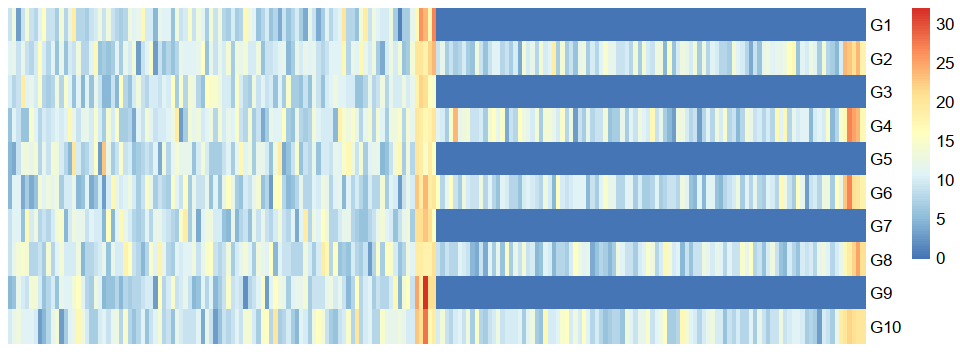

In [91]:
fig.size(3, 8)
pheatmap(exprs, cluster_cols = FALSE, cluster_rows = FALSE, labels_col = '')

## Learn model for each cluster

In [93]:
models <- get_model_pars_mix(exprs, 'y ~ depth', meta_data, R)


## Compute residuals

In [96]:
residuals <- compute_residuals(exprs, models, meta_data)

## Correct for depth 

    NOTE: cannot do a directly subtraction, b/c model is not linear. 

    Remove cell depth
    Add expected depth 

In [98]:
exprs_corr <- correct_mix(residuals, models, meta_data)

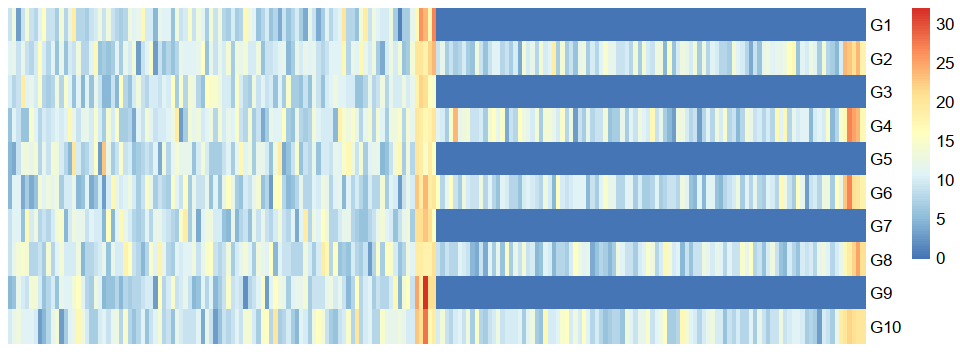

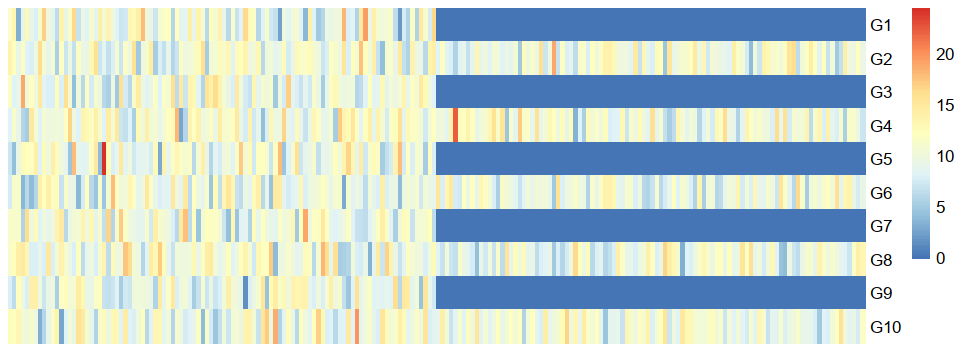

In [99]:
fig.size(3, 8)
pheatmap(exprs, cluster_cols = FALSE, cluster_rows = FALSE, labels_col = '')
pheatmap(exprs_corr, cluster_cols = FALSE, cluster_rows = FALSE, labels_col = '')

In [883]:

X <- melody(exprs, meta_data, R)

# TOTALseq

In [3]:
read10x <- function(run, suffix) {
#     barcode.loc <- file.path(run, "barcodes.tsv")
#     gene.loc <- file.path(run, "genes.tsv")
#     matrix.loc <- file.path(run, "matrix.mtx")
    barcode.loc <- list.files(run, pattern = 'barcodes.tsv', full.names = TRUE)
    gene.loc <- list.files(run, pattern = 'features.tsv|genes.tsv', full.names = TRUE)
    matrix.loc <- list.files(run, pattern = 'matrix.mtx', full.names = TRUE)

    data <- readMM(file = matrix.loc) %>% as("dgCMatrix")
    cell.names <- readLines(barcode.loc)
    cell.names <- gsub("-1$", "", cell.names)
    if (!missing(suffix)) {
        cell.names %<>% paste(suffix, sep = "_")
    }
    
    gene.names <- fread(gene.loc, header = FALSE)$V2
    row.names(data) <- gene.names
    colnames(data) <- cell.names

    
    return(as(data, "dgCMatrix"))
#     return(as(sumOverRowNames(data), "dgCMatrix"))
}


In [4]:
fname <- '/data/srlab/bwh10x/190305_KW6725_10x_rawbcl/cellranger-3.0.2/GRCh38/BRI-197/outs/filtered_feature_bc_matrix/'

x <- read10x(fname)
proteins <- row.names(x) %>% tail(85) 
genes <- setdiff(row.names(x), proteins)
exprs_raw <- x[genes, ]
exprs_prot <- x[proteins, ]

In [5]:
## for sumGroups
sourceCpp("/data/srlab/ik936/fast_wilcox.cpp")
sumOverRowNames <- function(X) {
    name_factors <- factor(row.names(X))
    res <- sumGroups(X@x, X@p, X@i, ncol(X), as.integer(name_factors) - 1, length(levels(name_factors)))
    row.names(res) <- levels(name_factors)[1:nrow(res)]
    colnames(res) <- colnames(X)
    return(res)
}

In [6]:
meta_raw <- data.frame(cell_id = colnames(exprs_raw))
meta_raw$nUMI <- Matrix::colSums(exprs_raw)
meta_raw$nUMI_prot <- Matrix::colSums(exprs_prot)
meta_raw$nGene <- Matrix::colSums(exprs_raw > 0)
mito_genes <- grep("^MT-", rownames(exprs_raw), value = TRUE, ignore.case = TRUE)
meta_raw$percent_mito <- Matrix::colSums(exprs_raw[mito_genes, ])/Matrix::colSums(exprs_raw)


head(meta_raw)

cell_id,nUMI,nUMI_prot,nGene,percent_mito
AAACCCAAGCGAGGAG,2935,864,1172,0.27904600
AAACCCAGTAAGCTCT,4551,633,1837,0.13096023
AAACCCAGTAAGTAGT,16106,2298,3965,0.06370297
AAACCCAGTCCACACG,2456,322,1128,0.19177524
AAACCCAGTTGCATCA,1684,651,795,0.23990499
AAACCCATCCGTGTAA,2953,912,1406,0.11852354


In [108]:
meta_data <- subset(meta_raw, nGene > 500 & percent_mito < .2 & (nUMI_prot < 1e4 | nUMI > 2000))
nrow(meta_raw); nrow(meta_data)
# table(meta_data$sample)


[1] 11838

[1] 10157

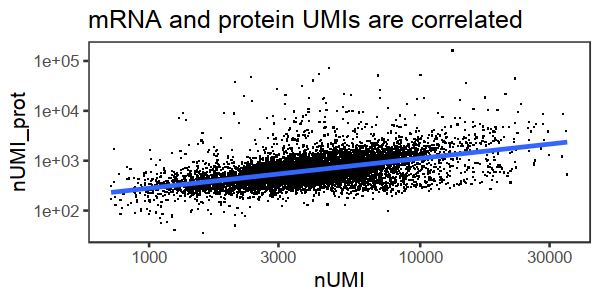

In [8]:
fig.size(2.5, 5)
meta_data %>% 
    ggplot(aes(nUMI, nUMI_prot)) + 
        geom_point(shape = '.') + 
        guides(color = FALSE) + 
        scale_y_log10() + 
        scale_x_log10() + 
        geom_smooth(method = 'lm') + 
        theme_test(base_size = 12) + 
        labs(title = 'mRNA and protein UMIs are correlated') + 
        NULL

In [15]:
genes_use <- which(Matrix::rowSums(exprs_raw[, meta_data$cell_id] != 0) >= 10)
exprs_norm <- exprs_raw[genes_use, meta_data$cell_id] %>% normalizeData(method = 'log')

vargenes_df <- singlecellmethods::findVariableGenes(exprs_norm, rep('A', ncol(exprs_norm)))

var_genes <- unique(data.table(vargenes_df)[, head(.SD[order(-gene_dispersion_scaled)], 1000), by = group][, symbol])
message(length(var_genes))
exprs_scaled <- exprs_norm[var_genes, ] %>% singlecellmethods::scaleData()
pca_res <- rARPACK::svds(exprs_scaled, 30, 0, 30)
V <- sweep(pca_res$v, 2, pca_res$d/max(pca_res$d), "*")

In [16]:
umap_res <- umap(V, n_neighbors = 50, learning_rate = 0.5, init = "pca", metric = 'cosine', 
                  min_dist = .1, n_threads = 4, approx_pow = TRUE)

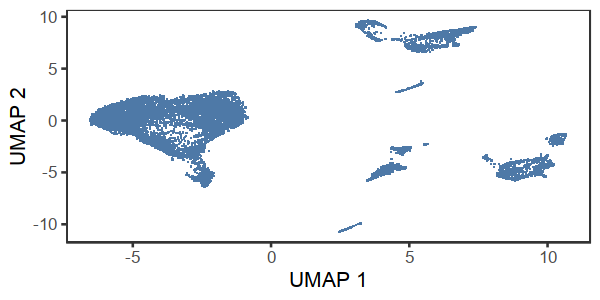

In [25]:
fig.size(2.5, 5)
meta_data$dummy <- 'A'
do_scatter(umap_res, meta_data, 'dummy', pt_size = 3, no_guides = TRUE,
                          palette_use = tableau_color_pal('Tableau 20')(17), do_labels = FALSE) 


In [47]:
library(singlecellmethods)
snn <- singlecellmethods:::buildSNN_fromFeatures(V, prune_snn = 1/25, nn_k = 30, nn_eps = 0.5)
    
ids_ref <- singlecellmethods:::leidenCluster(snn, c(.1, .01, .001), min_cluster_size = 10, 
                                             verbose = TRUE, pythondir = "/PHShome/ik936/anaconda3/bin/python")


Resolution 0.100000 yielded 20 clusters
Resolution 0.010000 yielded 7 clusters
Resolution 0.001000 yielded 4 clusters


In [56]:
colnames(ids_ref) <- c('X1', 'X01', 'X001')

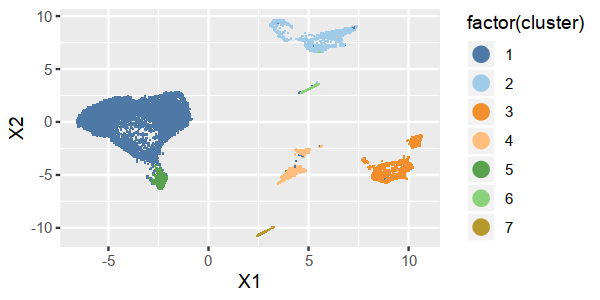

In [62]:
umap_res %>% data.frame() %>% 
#     cbind(meta_data) %>% 
    cbind(cluster = ids_ref[, 2]) %>% 
    ggplot(aes(X1, X2, color = factor(cluster))) + 
        geom_point(shape = '.') + 
        guides(color = guide_legend(override.aes = list(stroke = 1, alpha = 1, shape = 16, size = 4)), alpha = FALSE) + 
        scale_color_tableau('Tableau 20')

In [63]:
library(wilcoxauc)
genes_use <- which(Matrix::rowSums(exprs_norm != 0) >= 5)
markers <- apply(ids_ref, 2, function(clusters) {
    wilcoxauc::fast_diff_exp(exprs_norm[genes_use, ], factor(paste0("c", clusters)))
})


In [260]:
library(wilcoxauc)
genes_use <- which(Matrix::rowSums(exprs_norm != 0) >= 5)
markers <- apply(ids_ref, 2, function(clusters) {
    wilcoxauc::fast_diff_exp(exprs_corr[genes_use, ], factor(paste0("c", clusters)))
})


In [46]:
markers[[1]]$auc[c('THY1', 'PDGFRA', 'NOTCH4', 'LYVE1', 'VWF'), ]

,c1,c2,c3,c4,c5,c6,c7
THY1,0.3925158,0.8012054,0.4535575,0.4371927,0.4371133,0.7797333,0.4502304
PDGFRA,0.3964508,0.8162972,0.4681217,0.4494450,0.4513916,0.4480357,0.4663349
NOTCH4,0.5380705,0.4434196,0.4459721,0.4475965,0.6890134,0.4586884,0.4492142
LYVE1,0.4617418,0.4905920,0.6175898,0.4806629,0.4805616,0.4924250,0.4965560
VWF,0.9008305,0.2056474,0.2108236,0.2312082,0.3194568,0.2684520,0.2516286


In [263]:
markers[[1]]$auc %>% nrow

[1] 16624

In [261]:
markers[[1]]$auc[c('THY1', 'PDGFRA', 'NOTCH4', 'LYVE1', 'VWF'), ]

ERROR: Error in markers[[1]]$auc[c("THY1", "PDGFRA", "NOTCH4", "LYVE1", "VWF"), : subscript out of bounds


In [64]:
i <- 1
.x <- markers[[2]]$fdr %>% apply(2, function(x) {
    message(paste0('c', i))
#     message(names(name_list[order(unlist(name_list))])[i])
    i <<- i + 1
    head(x[order(x, decreasing = T)], 20) %>% names %>% print()
#     head(x[order(x, decreasing = T)], 10) %>% names %>% print()
})

c1


 [1] "ACKR1"   "AQP1"    "GNG11"   "SPARCL1" "VWF"     "IGFBP7"  "TM4SF1" 
 [8] "EGFL7"   "PLVAP"   "PECAM1"  "ECSCR"   "PDLIM1"  "RPL3"    "RPS18"  
[15] "CLEC14A" "NPDC1"   "EMCN"    "POSTN"   "SOX18"   "ADGRL4" 


c2


 [1] "C1S"     "LUM"     "ISLR"    "DCN"     "COL1A2"  "PCOLCE"  "ABI3BP" 
 [8] "WISP2"   "COL1A1"  "COL6A3"  "PLA2G2A" "DPT"     "EFEMP1"  "CCDC80" 
[15] "PLAC9"   "COL3A1"  "C1R"     "PRRX1"   "ASPN"    "COL5A2" 


c3


 [1] "AIF1"   "FCER1G" "TYROBP" "MS4A6A" "CYBB"   "LYZ"    "MS4A7"  "LST1"  
 [9] "LAPTM5" "FCGR2A" "MARCO"  "S100A9" "SPI1"   "MARCH1" "FPR3"   "CD68"  
[17] "CD163"  "CSF1R"  "VAMP8"  "FCGR3A"


c4


 [1] "CD3D"  "GZMA"  "NKG7"  "CCL5"  "CST7"  "CD69"  "TRBC1" "CD3G"  "GZMM" 
[10] "CD2"   "GZMB"  "TRAC"  "GZMK"  "TRBC2" "GZMH"  "CXCR4" "HCST"  "CD3E" 
[19] "PTPRC" "IL32" 


c5


 [1] "SEMA3G"   "GJA4"     "HEY1"     "TMEM178A" "CXCL12"   "PODXL"   
 [7] "SLC9A3R2" "SSUH2"    "NEBL"     "DEPP1"    "FABP4"    "BTNL9"   
[13] "ATP13A3"  "IGFBP3"   "KRT19"    "A2M"      "IFI27"    "SRP14"   
[19] "CRYBG3"   "GLUL"    


c6


 [1] "RGS5"     "COX4I2"   "FRZB"     "ITGA7"    "SYNPO2"   "ACTA2"   
 [7] "CARMN"    "NOTCH3"   "CDH6"     "TBX2"     "ABCC9"    "KCNJ8"   
[13] "LMOD1"    "MYH11"    "ID4"      "TPM2"     "FAM162B"  "SEPT4"   
[19] "MRVI1"    "PPP1R14A"


c7


 [1] "TNFRSF17" "DERL3"    "FCRL5"    "MZB1"     "CD79A"    "POU2AF1" 
 [7] "IGHG2"    "JSRP1"    "IGLV6-57" "SDC1"     "IGLV3-1"  "RASSF6"  
[13] "IGHGP"    "SPAG4"    "HLA-DOB"  "CD27"     "PNOC"     "FAM30A"  
[19] "MEI1"     "PIM2"    


In [259]:
sum(exprs_corr == 0) / prod(dim(exprs_corr))
sum(exprs_norm == 0) / prod(dim(exprs_norm))

[1] 0.6556135

[1] 0.9004556

## does gene UMI vary over clusters? 

Warning message:
“Removed 61 rows containing non-finite values (stat_boxplot).”

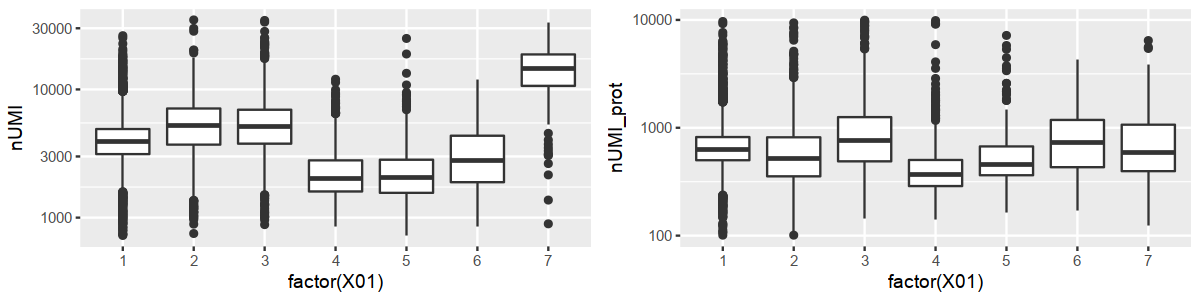

In [74]:
fig.size(2.5, 10)
meta_data %>% 
    cbind(ids_ref) %>% data.frame() %>% 
    ggplot(aes(factor(X01), nUMI)) + 
        geom_boxplot() +
        scale_y_log10() + 
meta_data %>% 
    cbind(ids_ref) %>% data.frame() %>% 
    ggplot(aes(factor(X01), nUMI_prot)) + 
        geom_boxplot() +
#         geom_violin() + 
        scale_y_continuous(trans = 'log10', limits = c(1e2, 1e4)) + 
#         scale_y_log10() + 
NULL
        
        

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 341882 rows containing non-finite values (stat_density).”

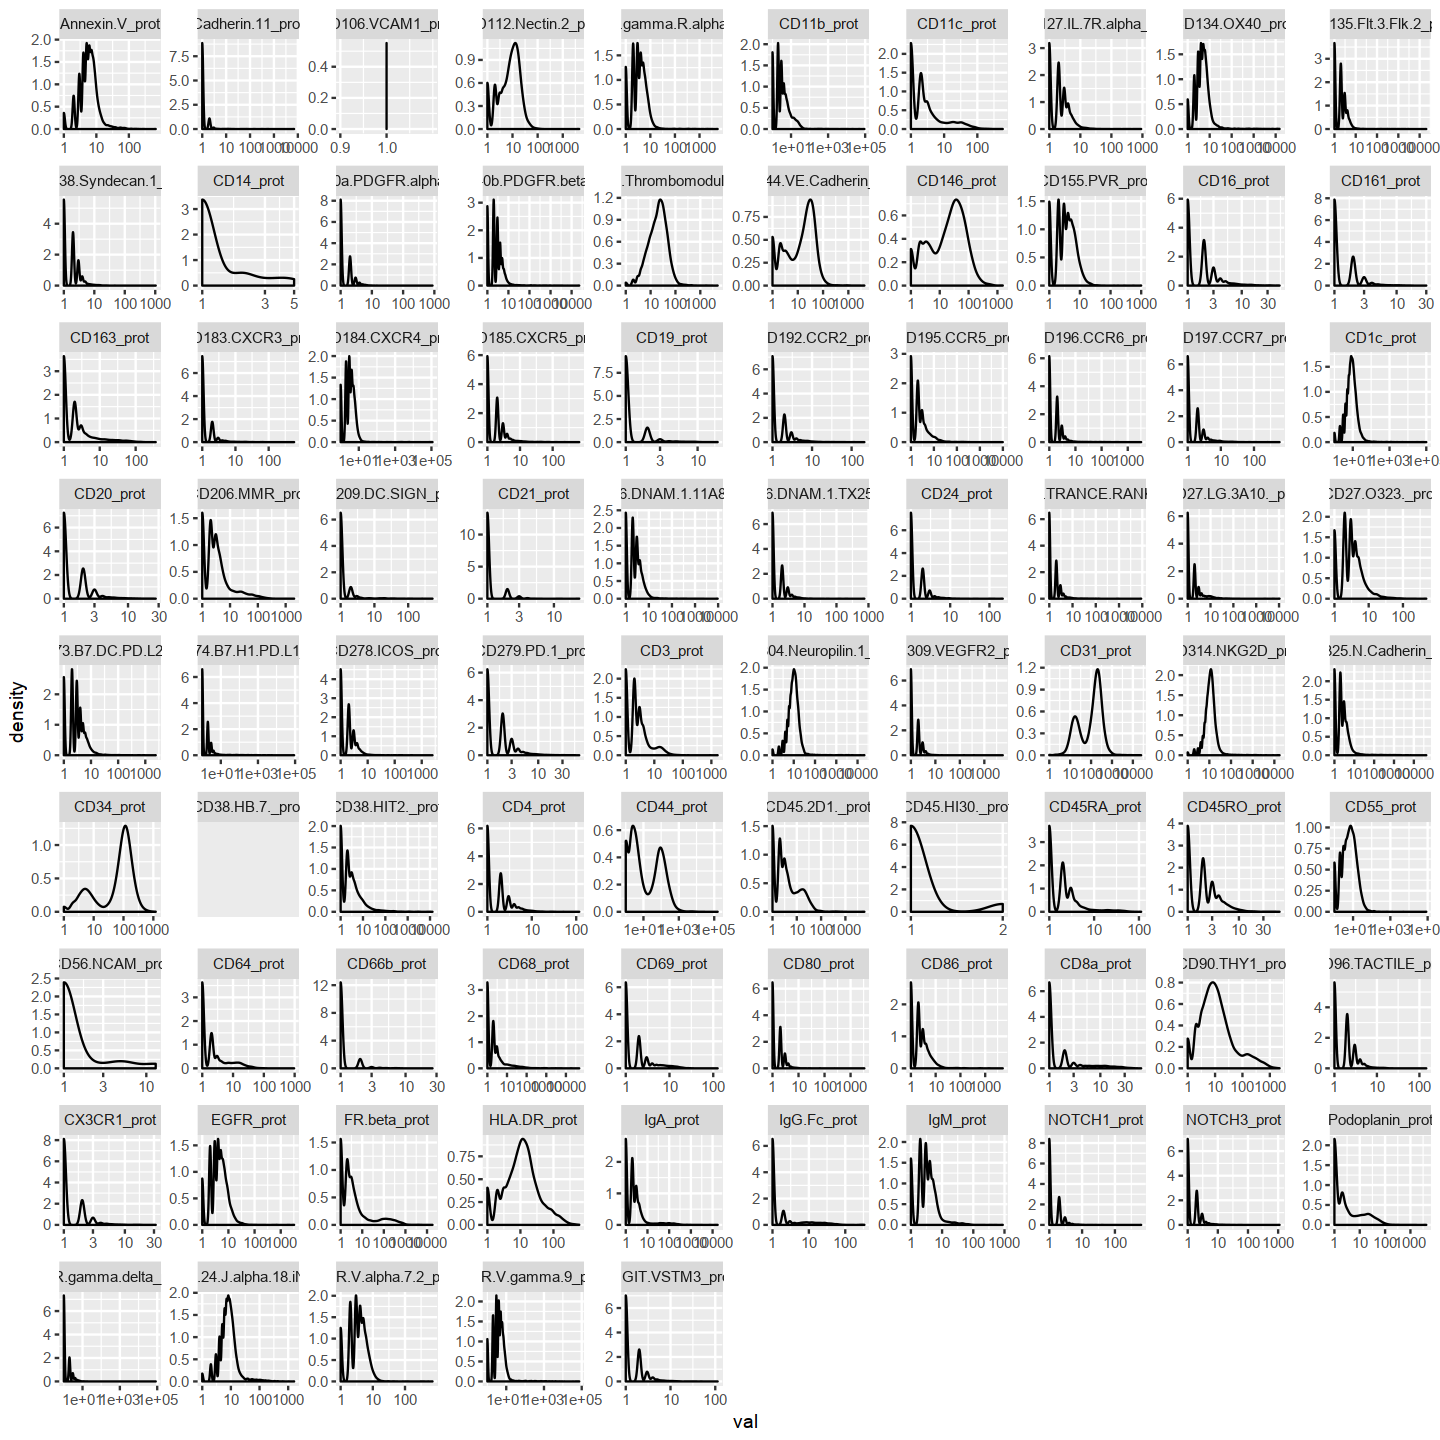

In [87]:
fig.size(12, 12)
exprs_prot %>% as.matrix %>% t %>% data.frame %>% 
    tibble::rownames_to_column('cell_id') %>% 
    tidyr::gather(protein, val, -cell_id) %>% 
    ggplot(aes(val)) + geom_density() + 
        scale_x_log10() + 
        facet_wrap(~protein, scales = 'free')

In [114]:
markers$X01$auc[c('NOTCH3', 'NOTCH1', 'NOTCH2', 'DLL4', 'JAG1'), , drop = FALSE]

,c1,c2,c3,c4,c5,c6,c7
NOTCH3,0.4724821,0.5357038,0.4922852,0.4869944,0.4897592,0.7806188,0.4916785
NOTCH1,0.5916206,0.3996710,0.4462009,0.4381435,0.5273271,0.4282393,0.4308653
NOTCH2,0.3828397,0.6867381,0.6194661,0.4634544,0.4489092,0.4731294,0.4866699
DLL4,0.5675535,0.4379295,0.4377397,0.4449812,0.5485591,0.4641065,0.4691371
JAG1,0.5169030,0.4956493,0.4473177,0.4372935,0.6289226,0.5906480,0.4470427


## does protein UMI vary over clusters? 

In [106]:
R <- model.matrix(~0 + factor(ids_ref[, 2])) %>% t 

In [115]:
meta_data$depth <- log1p(meta_data$nUMI_prot)
head(meta_data)

,cell_id,nUMI,nUMI_prot,nGene,percent_mito,depth
2,AAACCCAGTAAGCTCT,4551,633,1837,0.13096023,6.452049
3,AAACCCAGTAAGTAGT,16106,2298,3965,0.06370297,7.740230
4,AAACCCAGTCCACACG,2456,322,1128,0.19177524,5.777652
6,AAACCCATCCGTGTAA,2953,912,1406,0.11852354,6.816736
7,AAACGAAAGCTTTGTG,3169,823,1374,0.09119596,6.714171
8,AAACGAACACCAGCCA,2499,487,1126,0.14485794,6.190315


In [271]:
head(row.names(exprs_norm))
head(genes_use)

[1] "AL627309.1" "AL669831.5" "FAM87B"     "LINC00115"  "FAM41C"    
[6] "AL645608.1"

AL627309.1 AL669831.5     FAM87B  LINC00115     FAM41C AL645608.1 
         1          2          3          4          5          6

In [242]:
system.time({
    suppressWarnings({
        models <- get_model_pars_mix(exprs_raw[genes_use, meta_data$cell_id], 'y ~ depth', meta_data, R, 0.05)
#         models <- get_model_pars_mix(exprs_prot[, meta_data$cell_id], 'y ~ depth', meta_data, R, 0.05)
    })
})



    user   system  elapsed 
2470.113   18.816 1368.495 

In [243]:
system.time({
    residuals <- compute_residuals(exprs_raw[genes_use, meta_data$cell_id], models, meta_data)
#     residuals <- compute_residuals(exprs_prot[, meta_data$cell_id], models, meta_data)
})


   user  system elapsed 
 63.771  49.734 107.106 

In [244]:
system.time({
    exprs_corr <- correct_mix(residuals, models, meta_data)
})


   user  system elapsed 
201.436 156.492 353.808 

In [266]:
residuals[[1]][1:5, 1:5]
residuals[[2]][1:5, 1:5]

5 x 5 Matrix of class "dgeMatrix"
            AAACCCAGTAAGCTCT AAACCCAGTAAGTAGT AAACCCAGTCCACACG AAACCCATCCGTGTAA
MIR1302-2HG    -1.388794e-12    -1.388794e-12    -1.388794e-12    -1.388794e-12
FAM138A        -1.388794e-12    -1.388794e-12    -1.388794e-12    -1.388794e-12
OR4F5          -1.388794e-12    -1.388794e-12    -1.388794e-12    -1.388794e-12
AL627309.1     -1.402746e-03    -4.576760e-04    -2.521351e-03    -1.021580e-03
AL627309.3     -1.039851e-04    -5.475321e-06    -4.856595e-04    -4.518636e-05
            AAACGAAAGCTTTGTG
MIR1302-2HG    -1.388794e-12
FAM138A        -1.388794e-12
OR4F5          -1.388794e-12
AL627309.1     -1.116866e-03
AL627309.3     -5.712245e-05

5 x 5 Matrix of class "dgeMatrix"
            AAACCCAGTAAGCTCT AAACCCAGTAAGTAGT AAACCCAGTCCACACG AAACCCATCCGTGTAA
MIR1302-2HG    -1.388794e-12    -1.388794e-12    -1.388794e-12    -1.388794e-12
FAM138A        -1.388794e-12    -1.388794e-12    -1.388794e-12    -1.388794e-12
OR4F5          -1.388794e-12    -1.388794e-12    -1.388794e-12    -1.388794e-12
AL627309.1     -3.164081e-03    -3.485043e-03    -3.008016e-03    -3.251822e-03
AL627309.3     -1.388794e-12    -1.388794e-12    -1.388794e-12    -1.388794e-12
            AAACGAAAGCTTTGTG
MIR1302-2HG    -1.388794e-12
FAM138A        -1.388794e-12
OR4F5          -1.388794e-12
AL627309.1     -3.226902e-03
AL627309.3     -1.388794e-12

In [268]:
models[[1]] %>% head

,X.Intercept.,depth
MIR1302-2HG,-27.3025851,-2.465228e-17
FAM138A,-27.3025851,-2.465228e-17
OR4F5,-27.3025851,-2.465228e-17
AL627309.1,-0.9595034,-8.694633e-01
AL627309.3,5.5741931,-2.285391e+00
AL627309.2,-27.3025851,-2.465228e-17


In [245]:
save(models, residuals, exprs_corr, file = '/data/srlab/ik936/symphony/temp1.rda')

In [252]:
var(log1p((exprs_corr)['NOTCH3', ]))
# var(log1p(exprs_norm['NOTCH3', ]))

ERROR: Error in as.matrix(exprs_corr)["NOTCH3", ]: subscript out of bounds


In [254]:
'NOTCH3' %in% row.names(exprs_corr)
'NOTCH3' %in% row.names(exprs_norm)
dim(exprs_corr); dim(exprs_norm)

[1] FALSE

[1] TRUE

[1] 16624 10157

[1] 16624 10157

In [256]:
head(row.names(exprs_corr))
head(row.names(exprs_norm))

[1] "MIR1302-2HG" "FAM138A"     "OR4F5"       "AL627309.1"  "AL627309.3" 
[6] "AL627309.2"

[1] "AL627309.1" "AL669831.5" "FAM87B"     "LINC00115"  "FAM41C"    
[6] "AL645608.1"

In [250]:
exprs_corr[1:5, 1:5]


[1] 16624 10157

5 x 5 sparse Matrix of class "dgCMatrix"
                                                     
MIR1302-2HG . .            . .           .           
FAM138A     . .            . .           .           
OR4F5       . .            . .           .           
AL627309.1  . 8.865767e-04 . 0.001979881 2.273863e-04
AL627309.3  . 8.749586e-05 . .           3.584873e-05

In [127]:
exprs_prot_clr <- singlecellmethods::normalizeData(exprs_prot[, meta_data$cell_id], method = 'geneCLR')

In [ ]:
library(wilcoxauc)
# genes_use <- which(Matrix::rowSums(exprs_norm != 0) >= 5)
# marker_p1 <- wilcoxauc::fast_diff_exp(exprs_prot_clr, factor(paste0("c", clusters)))



In [151]:
library(limma)

# design <- model.matrix(~1 + Cell.type + Disease.Tissue + Sex + isi, meta_use)
design <- model.matrix(~ 0 + factor(ids_ref[, 2]))

dge1 <- exprs_prot_clr %>%
    limma::lmFit(design) %>% 
    limma::eBayes() 
# %>% 
#     limma::topTable(coef = 2, number = 1e6) %>% 
#     tibble::rownames_to_column('symbol')

dge2 <- log1p(exprs_corr) %>%
    limma::lmFit(design) %>% 
    limma::eBayes() #%>% 
#     limma::topTable(coef = 2, number = 1e6) %>% 
#     tibble::rownames_to_column('symbol')


Warning message:
“Zero sample variances detected, have been offset away from zero”

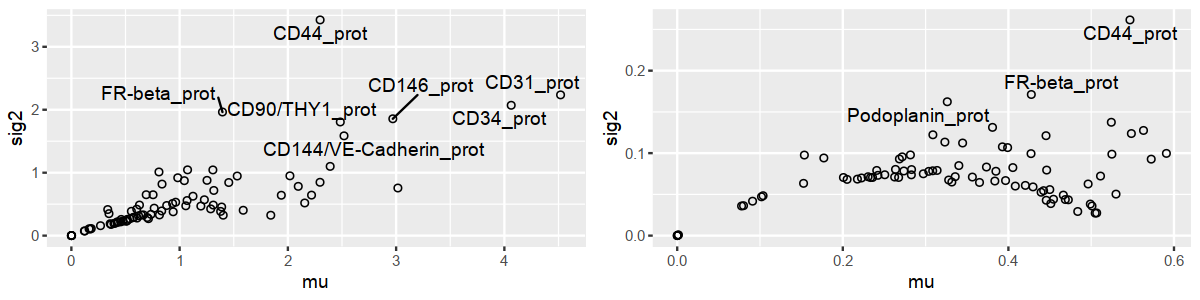

In [152]:
fig.size(2.5, 10)

data.table(symbol = row.names(exprs_corr), 
           mu = apply(log1p(exprs_corr), 1, mean), 
           sig2 = apply(log1p(exprs_corr), 1, var)) %>% 
    ggplot(aes(mu, sig2)) + 
        geom_point(shape = 21) + 
        geom_text_repel(data = . %>% subset(sig2 > 1.5), aes(label = symbol)) + 
data.table(symbol = row.names(exprs_prot_clr), 
           mu = apply(log1p(exprs_prot_clr), 1, mean), 
           sig2 = apply(log1p(exprs_prot_clr), 1, var)) %>% 
    ggplot(aes(mu, sig2)) +  
        geom_point(shape = 21) + 
        geom_text_repel(data = . %>% subset(sig2 > .15), aes(label = symbol)) + 
        NULL

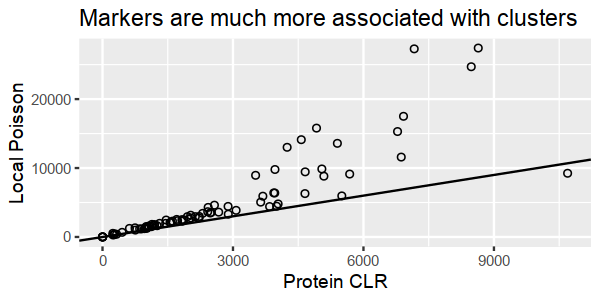

In [163]:
# plot(dge1$F, dge2$F)
fig.size(2.5, 5)
data.table(symbol = row.names(exprs_corr), F1 = dge1$F, F2 = dge2$F) %>% 
    ggplot(aes(F1, F2)) + 
        geom_point(shape = 21) + 
        geom_abline(slope = 1, intercept = 0) + 
        labs(x = 'Protein CLR', y = 'Local Poisson',
             title = 'Markers are much more associated with clusters') + 
        NULL

In [167]:
dge2 <- log1p(exprs_corr) %>%
    limma::lmFit(design) %>% 
    limma::eBayes()

In [175]:
ids <- grep('NOTCH3', row.names(exprs_corr), value = TRUE)
dge1$coefficients[ids, , drop = FALSE]
dge2$coefficients[ids, , drop = FALSE]

,"factor(ids_ref[, 2])1","factor(ids_ref[, 2])2","factor(ids_ref[, 2])3","factor(ids_ref[, 2])4","factor(ids_ref[, 2])5","factor(ids_ref[, 2])6","factor(ids_ref[, 2])7"
NOTCH3_prot,0.3444799,0.3132347,0.3964494,0.3437825,0.369837,0.3952202,0.3799558


,"factor(ids_ref[, 2])1","factor(ids_ref[, 2])2","factor(ids_ref[, 2])3","factor(ids_ref[, 2])4","factor(ids_ref[, 2])5","factor(ids_ref[, 2])6","factor(ids_ref[, 2])7"
NOTCH3_prot,0.5016435,0.4571314,0.5691569,0.5036637,0.5289257,0.5669726,0.5442666


In [166]:
dge2 %>% subset(grepl('NOTCH3', symbol))

,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
58,NOTCH3_prot,0.4571314,0.5071865,34.26068,1.566806e-243,2.296181e-243,545.3261


In [166]:
dge2 %>% subset(grepl('NOTCH3', symbol))

,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
58,NOTCH3_prot,0.4571314,0.5071865,34.26068,1.566806e-243,2.296181e-243,545.3261


In [177]:
source("/data/srlab/ik936/NOTCH/notebooks/paper_utils.R")

[1] "CD3_prot"       "CD90/THY1_prot" "CD146_prot"     "IgG-Fc_prot"

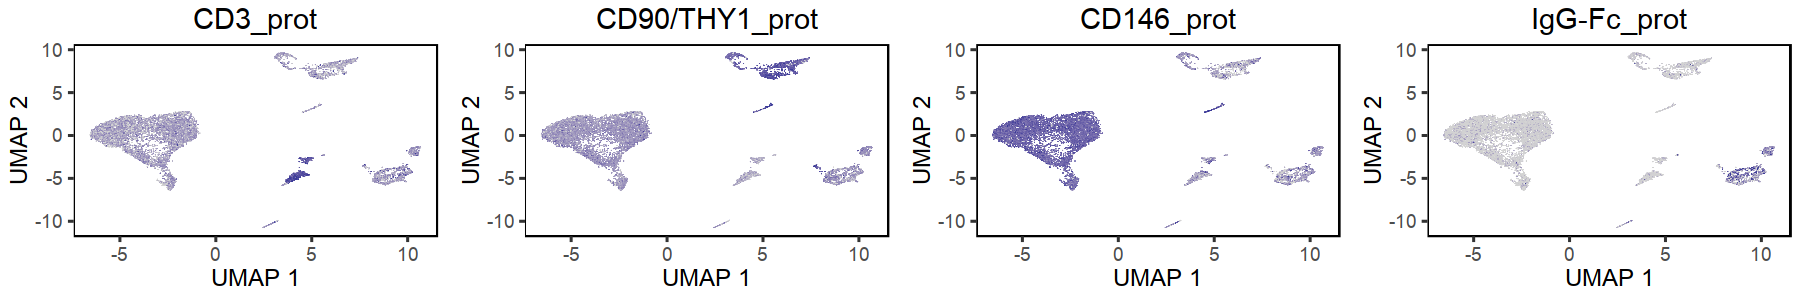

In [204]:
# features <- grep('NOTCH3|NOTCH1|CD90', row.names(exprs_corr), value = TRUE)
features <- grep('CD146|IgG-Fc|CD3_|CD90', row.names(exprs_corr), value = TRUE)
features
fig.size(2.5, 15)
plotFeatures(log1p(exprs_corr), umap_res, order_by_expression = FALSE, no_guide = TRUE, 
             features, nrow = 1, qlo = .01, qhi = .99)

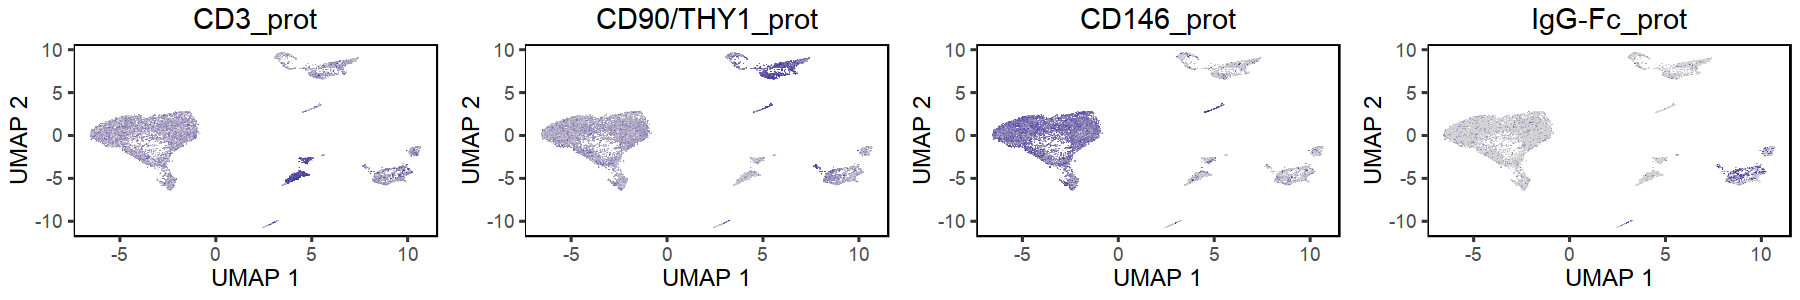

In [205]:
plotFeatures(log1p(exprs_prot_clr), umap_res, order_by_expression = FALSE, no_guide = TRUE, 
             features, nrow = 1, qlo = .01, qhi = .99)

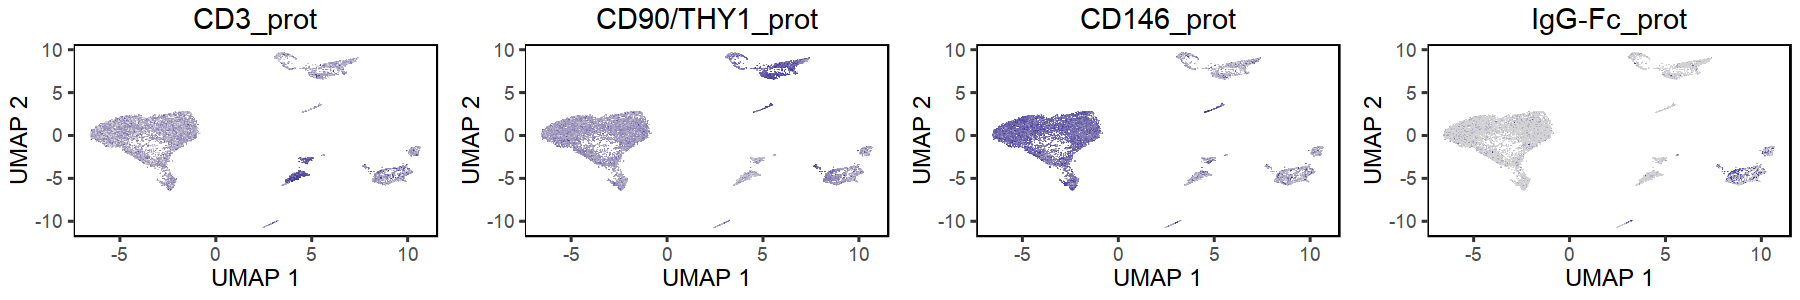

In [206]:
plotFeatures(log1p(exprs_prot[, meta_data$cell_id]), umap_res, order_by_expression = FALSE, no_guide = TRUE, 
             features, nrow = 1, qlo = .01, qhi = .99)

# Cell lines benchmark

    - smoothing model parameters based on mean expression? 

In [300]:
exprs_raw <- read10x('/data/srlab/ik936/Foxxy/data/jurkat/fifty_fifty/hg19/')

meta_raw <- data.frame(cell_id = colnames(exprs_raw))
meta_raw$nUMI <- Matrix::colSums(exprs_raw)
meta_raw$nGene <- Matrix::colSums(exprs_raw > 0)
mito_genes <- grep("^MT-", rownames(exprs_raw), value = TRUE, ignore.case = TRUE)
meta_raw$percent_mito <- Matrix::colSums(exprs_raw[mito_genes, ])/Matrix::colSums(exprs_raw)


head(meta_raw)

cell_id,nUMI,nGene,percent_mito
AAACATACAGCTAC,32189,5057,0.02590947
AAACATTGTAAGGA,6498,2291,0.01985226
AAACCGTGGCGTAT,10108,2792,0.01889592
AAACGCACTACTGG,8777,2717,0.01503931
AAACGCTGAAGATG,20764,3962,0.01772298
AAACGCTGCGCATA,14275,3408,0.02024518


In [301]:
m_types <- fread('/data/srlab/ik936//harmony_paper/jurkat/data/metadata.csv') %>% 
    subset(dataset == 'half') %>% 
    dplyr::mutate(cell_id = gsub('half_', '', cell_id)) %>% 
    dplyr::select(cell_id, cell_type)

In [302]:
meta_data <- meta_raw %>% 
    dplyr::inner_join(m_types) %>% 
    subset(nUMI > 7000 & nUMI < 30000) %>% 
    dplyr::group_by(cell_type) %>% dplyr::sample_n(500) %>% dplyr::ungroup()

meta_data$depth <- log(meta_data$nUMI)


exprs_raw <- exprs_raw[, meta_data$cell_id]


Joining, by = "cell_id"
Warning message:
“Column `cell_id` joining factor and character vector, coercing into character vector”

In [450]:
genes_use <- which(Matrix::rowSums(exprs_raw != 0) >= 10)
exprs_raw <- exprs_raw[genes_use, ]

In [452]:
nrow(meta_data)
head(meta_data)
dim(exprs_raw)

[1] 1000

cell_id,nUMI,nGene,percent_mito,cell_type,depth
GTGGAGGACACAAC,18417,3823,0.01927567,jurkat,9.821029
GAAACCTGCGTTGA,8153,2497,0.02440819,jurkat,9.006141
CGGCATCTCTTACT,11341,2972,0.02072128,jurkat,9.336180
CACCACTGCACAAC,8390,2585,0.01978546,jurkat,9.034796
CACATACTTCGACA,21700,4083,0.01963134,jurkat,9.985068
CAAGACACTCGCCT,9801,2611,0.02020202,jurkat,9.190240


[1] 12893  1000

## Check for nUMI differences

There is a difference between the two cell types! 

In [304]:
data.table(meta_data)[, .(median(nUMI)), by = cell_type]

cell_type,V1
jurkat,13048.5
t293,15665.0


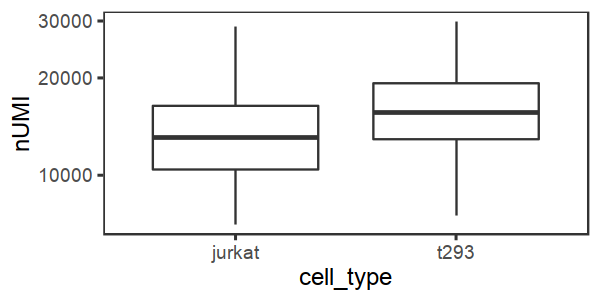

In [305]:
fig.size(2.5, 5)
meta_data %>% 
    ggplot(aes(cell_type, nUMI)) + 
        geom_boxplot() + 
        theme_test(base_size = 14) + 
        scale_y_log10()

## Global DGE

Global Poisson correction

In [378]:
melody <- function(exprs, meta_data, R) {
    models <- get_model_pars_mix(exprs, 'y ~ depth', meta_data, R)
    residuals <- compute_residuals(exprs, models, meta_data)
    exprs_corr <- correct_mix(residuals, models, meta_data, R)
    return(exprs_corr)
}

R <- matrix(rep(1, nrow(meta_data)), nrow = 1)
system.time({
    exprs1 <- melody(exprs_raw, meta_data, R)
})
    

   user  system elapsed 
 68.703   0.450  69.091 

Limma on corrected values

In [561]:
library(limma)
dge1 <- exprs1 %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')


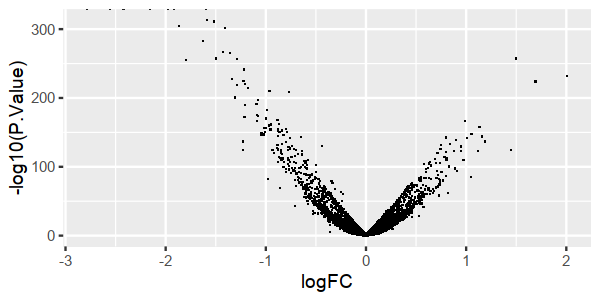

In [562]:
dge1 %>% 
    subset(!is.na(t)) %>% 
    ggplot(aes(logFC, -log10(P.Value))) + 
        geom_point(shape = '.')

## Downsample only Jurkats

In [516]:
table(meta_data$cell_type)


jurkat   t293 
   500    500 

Sample each cell from a multinomial

Inefficient way to do it: expand out all the counts, sample them evenly, 

In [781]:
do_downsample <- function(X, downsample_factor = 1) {
    down_new <- split(seq_len(length(X@i)), rep(seq_len(ncol(X)), times = diff(X@p))) %>% 
        lapply(function(idx) {
            table(sample(rep(X@i[idx], times = X@x[idx]), downsample_factor * sum(X@x[idx]))) %>% 
                data.table
        })

    p_new <- as.integer(c(0, cumsum(lapply(down_new, nrow))))
    ix_new <- Reduce(rbind, down_new)    
    
    sparseMatrix(i = 1 + as.integer(ix_new$V1), p = p_new, x = ix_new$N, dims = dim(X), giveCsparse = TRUE, dimnames = dimnames(X))
}



In [782]:
system.time({
    X2 <- do_downsample(X, .8)
})
    

   user  system elapsed 
 21.860   0.455  22.344 

In [785]:
# downsample_factor <- .6
idx_jurkat <- which(meta_data$cell_type == 'jurkat')
exprs_down <- as.matrix(exprs_raw)
exprs_down[, idx_jurkat] <- do_downsample(exprs_raw[, idx_jurkat], .6) %>% as.matrix()

# Reduce(cbind, apply(exprs_raw[, idx_jurkat], 2, function(x) {
#     rmultinom(1, sum(x) * downsample_factor, prob = x / sum(x)) %>% data.frame()
# })) %>% as.matrix()

colnames(exprs_down) <- colnames(exprs_raw)
exprs_down <- as(exprs_down, 'dgCMatrix')

meta_data$nUMI_down <- colSums(exprs_down)

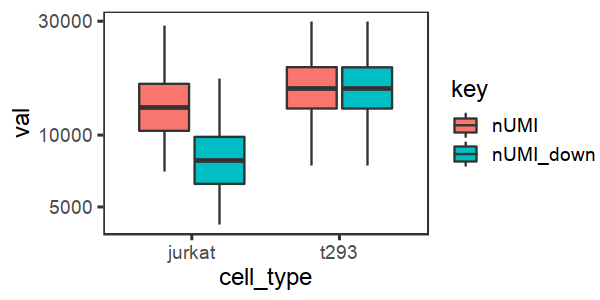

In [786]:
fig.size(2.5, 5)
meta_data %>% 
    tidyr::gather(key, val, nUMI, nUMI_down) %>% 
    ggplot(aes(cell_type, val, fill = key)) + 
        geom_boxplot() + 
        theme_test(base_size = 14) + 
        scale_y_log10()

In [828]:
# prop.table(meta_data$nUMI, )

## Global vs Local DGE

Global

In [787]:
R <- matrix(rep(1, nrow(meta_data)), nrow = 1)
meta_data$depth <- log(meta_data$nUMI)
system.time({
    exprs2a <- melody(exprs_down, meta_data, R)
})
    

   user  system elapsed 
 70.933   0.296  71.176 

In [788]:
library(limma)
dge2a <- exprs2a %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')


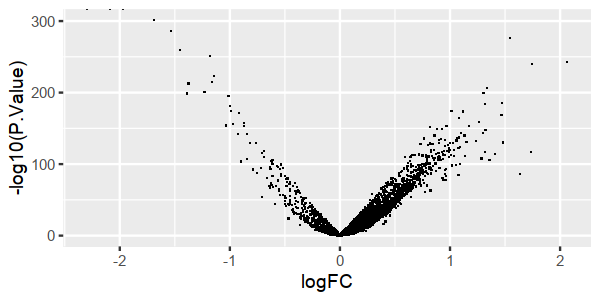

In [789]:
dge2a %>% 
    subset(!is.na(t)) %>% 
    ggplot(aes(logFC, -log10(P.Value))) + 
        geom_point(shape = '.')

Local

    TODO: figure out why local glm fit does not converge anymore (bug or data?) 

In [790]:
R <- t(model.matrix(~ 0 + meta_data$cell_type))
meta_data$depth <- log(meta_data$nUMI_down)

system.time({
    suppressWarnings({
        exprs2b <- melody(exprs_down, meta_data, R)
    })    
})
    

   user  system elapsed 
111.449   0.648 111.944 

In [791]:
library(limma)
dge2b <- exprs2b %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')


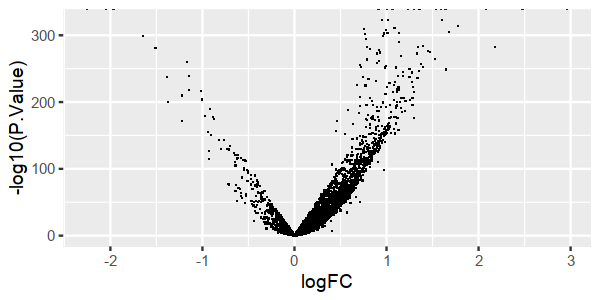

In [792]:
dge2b %>% 
    subset(!is.na(t)) %>% 
    ggplot(aes(logFC, -log10(P.Value))) + 
        geom_point(shape = '.')

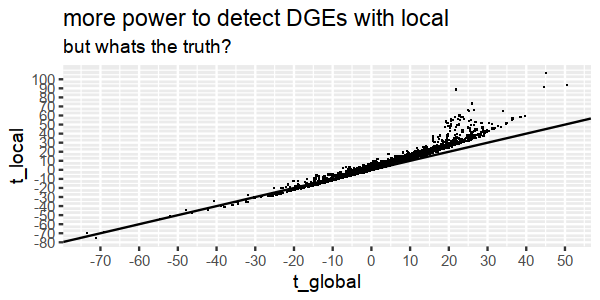

In [985]:
fig.size(2.5, 5)
dplyr::inner_join(dge2a, dge2b, by = c('symbol'), suffix = c('_global', '_local')) %>% 
#     ggplot(aes(-log10(P.Value_global), -log10(P.Value_local))) + 
    ggplot(aes(t_global, t_local)) + 
        geom_point(shape = '.') + 
        geom_abline(slope = 1, intercept = 0) + 
        scale_x_continuous(breaks = seq(-100, 100, 10)) + 
        scale_y_continuous(breaks = seq(-100, 100, 10)) + 
#         geom_label_repel(data = . %>% subset(t_local > 70), aes(label = symbol)) + 
        labs(title = 'more power to detect DGEs with local', 
             subtitle = 'but whats the truth?')

In [839]:
dplyr::inner_join(dge2a, dge2b, by = c('symbol'), suffix = c('_global', '_local')) %>% 
#     dplyr::arrange(-abs(t_local - t_global)) %>% 
#     subset(grepl('^MT-|MALAT1', symbol)) %>% 
    subset(symbol %in% c('B2M', 'MALAT1', 'ACTB', 'GAPDH')) %>% 
    dplyr::select(symbol, t_local, t_global) %>% 
    head(20)

,symbol,t_local,t_global
486,B2M,-13.353928,-17.0638806
765,GAPDH,-6.215072,-14.2045717
1465,MALAT1,-4.338945,-10.5087084
11569,ACTB,4.253261,-0.8216771


In [845]:
dplyr::inner_join(dge2a, dge2b, by = c('symbol'), suffix = c('_global', '_local')) %>% 
    dplyr::arrange(-abs(t_local - t_global)) %>% 
#     subset(grepl('^MT-|MALAT1', symbol)) %>% 
#     subset(symbol %in% c('B2M', 'MALAT1', 'ACTB', 'GAPDH')) %>% 
    dplyr::select(symbol, t_local, t_global) %>% 
    head(20)

symbol,t_local,t_global
RPS2,88.76426,21.79947
CKB,106.59671,45.19475
RPL29,73.19793,26.04959
XIST,91.41715,44.67332
CDKN2A,93.48991,50.49712
RPL12,66.28385,24.91740
RPS4X,66.37233,26.56281
GNB2L1,64.85699,25.15811
RPS8,60.31131,22.75458
RPL32,58.40445,21.64303


# Poisson vs Gaussian

## Local models

In [879]:
dge1 %>% dplyr::arrange(-abs(t)) %>% head(10)

symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
CD3D,-2.552857,1.5946984,-90.57135,0.000000e+00,0.000000e+00,1099.4725
ARHGDIB,-2.420716,1.4485729,-89.21111,0.000000e+00,0.000000e+00,1086.0931
TMSB4X,-2.783112,2.0662768,-85.08728,0.000000e+00,0.000000e+00,1044.5268
ADA,-2.159773,1.5788903,-70.67898,0.000000e+00,0.000000e+00,886.2927
MZB1,-1.977641,1.1345522,-68.19727,0.000000e+00,0.000000e+00,856.8004
EIF5A,-1.913590,2.5070217,-64.30505,0.000000e+00,0.000000e+00,809.1085
OCIAD2,-1.596911,0.8978592,-64.26465,0.000000e+00,0.000000e+00,808.6041
BEX1,-1.587602,0.9540196,-56.60332,3.880546e-314,6.253985e-311,709.3373
LCK,-1.521360,0.8499116,-56.20384,8.520188e-312,1.220564e-308,703.9611
NUCB2,-1.869763,1.7166879,-55.14623,1.484035e-305,1.913366e-302,689.6309


In [955]:
R <- t(model.matrix(~ 0 + meta_data$cell_type))
meta_data$depth <- log(meta_data$nUMI_down)

idx_rand <- sample(nrow(exprs_raw), 1000)
# idx_rand <- seq_len(nrow(exprs_down))

exprs_lm <- melody(exprs_down[idx_rand, ], meta_data, R, R_thresh=0.05, family='lm')
exprs_gauss <- melody(exprs_down[idx_rand, ], meta_data, R, R_thresh=0.05, family='gaussian')
exprs_poiss <- melody(exprs_down[idx_rand, ], meta_data, R, R_thresh=0.05, family='poisson')


Warning message:
“glm.fit: fitted rates numerically 0 occurred”Warning message:
“glm.fit: fitted rates numerically 0 occurred”

In [956]:
library(limma)

dge3a <- exprs_lm %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')

dge3b <- exprs_gauss %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')

dge3c <- exprs_poiss %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')


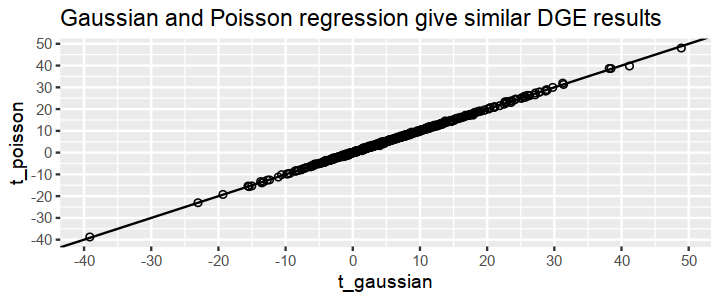

In [979]:
fig.size(2.5, 6)
dplyr::inner_join(dge3b, dge3c, by = c('symbol'), suffix = c('_gaussian', '_poisson')) %>% 
    ggplot(aes(t_gaussian, t_poisson)) + 
        geom_abline(slope = 1, intercept = 0) + 
        geom_point(shape = 21) + 
        scale_x_continuous(breaks = seq(-100, 100, 10)) + 
        scale_y_continuous(breaks = seq(-100, 100, 10)) + 
        labs(title = 'Gaussian and Poisson regression give similar DGE results') +
        NULL

## CPM is the problem, not Gaussian vs Poisson

In [966]:
exprs_norm <- expm1(singlecellmethods::normalizeData(exprs_down, method = 'log'))
R <- t(model.matrix(~ 0 + meta_data$cell_type))
meta_data$depth <- log(meta_data$nUMI_down)
idx_rand <- sample(nrow(exprs_norm), 1000)

exprs_fit_raw <- melody(exprs_down[idx_rand, ], meta_data, R, R_thresh=0.05, family='gaussian')
exprs_fit_cpm <- melody(exprs_norm[idx_rand, ], meta_data, R, R_thresh=0.05, family='gaussian')


In [967]:
library(limma)

dge4b <- exprs_fit_raw %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')

dge4c <- exprs_fit_cpm %>% log1p %>% 
    limma::lmFit(model.matrix(~1 + cell_type, meta_data)) %>% 
    limma::eBayes() %>% 
    limma::topTable(coef = 2, number = 1e6) %>% 
    tibble::rownames_to_column('symbol')


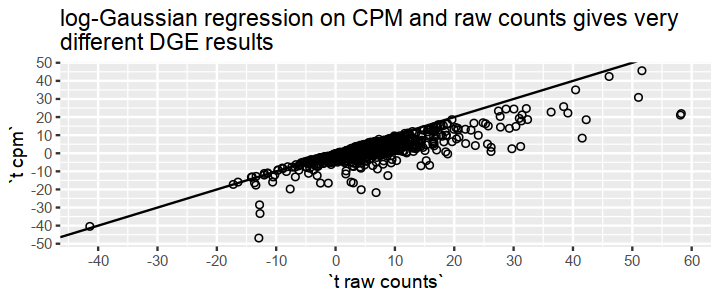

In [983]:
fig.size(2.5, 6)
dplyr::inner_join(dge4b, dge4c, by = c('symbol'), suffix = c(' raw counts', ' cpm')) %>% 
    ggplot(aes(`t raw counts`, `t cpm`)) + 
        geom_abline(slope = 1, intercept = 0) + 
        geom_point(shape = 21) + 
        scale_x_continuous(breaks = seq(-100, 100, 10)) + 
        scale_y_continuous(breaks = seq(-100, 100, 10)) + 
        labs(title = 'log-Gaussian regression on CPM and raw counts gives very\ndifferent DGE results') + 
        NULL

## technical: using lm with matrix

In [1023]:
# iris
x <- lm(formula = as.matrix(iris[, 1:3]) ~ iris$Species) 
t(x$coefficients)

,(Intercept),iris$Speciesversicolor,iris$Speciesvirginica
Sepal.Length,5.006,0.930,1.582
Sepal.Width,3.428,-0.658,-0.454
Petal.Length,1.462,2.798,4.090


In [1046]:
R <- t(model.matrix(~ 0 + meta_data$cell_type))
meta_data$depth <- log(meta_data$nUMI_down)
idx_rand <- sample(nrow(exprs_norm), 1000)

# system.time({
#     exprs_1 <- melody(exprs_down[idx_rand, ], meta_data, R, R_thresh=0.05, family='lm2')    
# })
system.time({
    exprs_2 <- melody(exprs_down[idx_rand, ], meta_data, R, R_thresh=0.05, family='lm')
})

max(abs(exprs_1 - exprs_2))

TODO: when correcting counts, do expm1 since you already used logp1


   user  system elapsed 
  0.622   0.000   0.517 

[1] 942.8348

# Functions

In [1047]:
get_model_pars_mix <- function (umi, model_str, model_data, R, R_thresh=.05, family='poisson') { 
    apply(R, 1, function(cluster_probs) {
        
        idx <- which(cluster_probs >= R_thresh)
        if (family == 'lm') {
            y <- umi[, idx] %>% as.matrix %>% t %>% log1p
#             y <- y[, colSums(y) > 0] %>% log1p
            fit <- lm(formula = y ~ model_data$depth[idx], weights = cluster_probs[idx]) 
            model_pars <- data.frame(t(fit$coefficients))
        } else {
            model_pars <- Reduce(rbind, apply(umi, 1, function(y) {
                y <- y[idx]

                ## TODO: replace y=0 response with appropriately sized vector
                if (family == 'poisson') {
                    if (sum(y) == 0) {
                        return(c(0, 0))
                    }

                    fit <- glm(
                        as.formula(model_str), 
                        data = model_data[idx, ], 
                        family = poisson, 
                        weights = cluster_probs[idx]
                    )   
                } else if (family == 'gaussian') {
                    y <- log1p(y)
                    if (sum(y) == 0) {
                        return(c(0, 0))
                    }

                    fit <- glm(
                        as.formula(model_str), 
                        data = model_data[idx, ], 
                        family = gaussian, 
                        weights = cluster_probs[idx]
                    )                
                } 
#                 else if (family == 'lm') {
#                     y <- log1p(y)
#                     if (sum(y) == 0) {
#                         return(c(0, 0))
#                     }

#                     fit <- lm(
#                         as.formula(model_str), 
#                         data = model_data[idx, ], 
#                         weights = cluster_probs[idx]
#                     )                

#                 } 
                return(data.frame(t(fit$coefficients)))
            }))
        }

        rownames(model_pars) <- rownames(umi)
        return(model_pars)
    })
}

In [944]:
compute_residuals <- function (exprs, models, cell_attr) {  
    design <- cbind(1, data.frame(cell_attr)[, c('depth')])
    lapply(models, function(model) {
        mu <- exp(tcrossprod(as.matrix(model), design))
        exprs - mu
    })
}

In [992]:
## add expected values to residuals
correct_mix <- function (residuals, models, cell_attr, R, force_pos = TRUE) {  
    ## TODO: (quantile) cut cells with outlier depth. Mean is sensitive to these
#     quantile(meta_data$depth, c(.01, .99))
    
    message('TODO: when correcting counts, do expm1 since you already used logp1')
    
    design <- cbind(1, data.frame(cell_attr)[, c('depth')])
    if (nrow(R) == 1) {
        expected_depth <- tcrossprod(cell_attr$depth, R) / sum(R)
    } else {
        expected_depth <- tcrossprod(cell_attr$depth, R) %*% diag(1 / rowSums(R))        
    }
    
    exprs_corrected <- Reduce(`+`, lapply(seq_len(nrow(R)), function(k) {
        ## Set depth to the cluster specific depth 
        ## CAUTION: assuming that second column is depth
        design[, 2] <- rep(expected_depth[k], nrow(design))
        mu <- exp(tcrossprod(as.matrix(models[[k]]), design))
        exprs_cluster <- mu + residuals[[k]]
        sweep(exprs_cluster, 2, R[k, ], '*')
    }))
    
    if (force_pos) {
        exprs_corrected[exprs_corrected < 0] <- 0
    }
    return(exprs_corrected)
}

In [891]:
melody <- function(exprs, meta_data, R, R_thresh=0.05, family='poisson') {
    models <- get_model_pars_mix(exprs, 'y ~ depth', meta_data, R, R_thresh, family)
    residuals <- compute_residuals(exprs, models, meta_data)
    exprs_corr <- correct_mix(residuals, models, meta_data, R)
    return(exprs_corr)
}
